In [544]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pylab as pl

In [256]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [257]:
df.shape

(101766, 50)

In [258]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [259]:
pd.options.display.max_columns = None
display(df)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Patient_Number

Collapsing of Multiple Encounters for same patient Some patients in the dataset had more than one encounter.We could not count them as independent encounters because that bias the results towards those patients who had multiple encounters. Thus we tried multiple techniques to collapse and consolidate multiple encounters for same patient such as:

Considering more than 2 readmissions across multiple encounters as readmission for collapsed record. Considering average stay at hospital across multiple encounters. Considering the percentage of the medication changes across multiple encounters Considering the total number of the encounters to replace the encounter unique ID Considering the combination of diagnoses across multiple encounters as a list However, taking the features such as “diagnosis”, for instance, we did not find it not meaningful to combine multiple categorical values into an array for building data model. We then considered first encounter and last encounter separately as possible representations of multiple encounters. However, last encounters gave extremely imbalanced data for readmissions (96/4 Readmissions vs No Readmissions) and thus, we decided to use first encounters of patients with multiple encounters. This resulted in dataset being reduced to about 70,000 encounters:

In [261]:
df['patient_nbr'].nunique()

71518

In [262]:
print('Number of rows which are duplicated',len(df)-df['patient_nbr'].nunique())

Number of rows which are duplicated 30248


In [263]:
df.duplicated(['patient_nbr']).sum()

30248

In [264]:
df.drop_duplicates(['patient_nbr'],keep='first',inplace=True)

In [265]:
df.shape

(71518, 50)

In [266]:
df.groupby('readmitted').size()

readmitted
<30     6293
>30    22240
NO     42985
dtype: int64

defined an output variable for our binary classification and we will try to predict if a patient is likely to be re-admitted within 30 days of discharge.

In [267]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')

In [268]:
df['OUTPUT_LABEL'].value_counts()

0    65225
1     6293
Name: OUTPUT_LABEL, dtype: int64

In [269]:
df['OUTPUT_LABEL'].value_counts(normalize=True)*100

0    91.200817
1     8.799183
Name: OUTPUT_LABEL, dtype: float64

As per admission discription we could see some null values mentioned in the data as a code(5,6,8).

In [270]:
df['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7], dtype=int64)

In [271]:
df['admission_type_id'].isnull().sum()

0

In [272]:
count=0
for i in df['admission_type_id']:
    if i==5 or i==6 or i==8 :
        count+=1
print(count)

8053


In [273]:
df['admission_type_id'] = df['admission_type_id'].replace([5,6,8],np.nan)

In [274]:
df['admission_type_id'].isnull().sum()

8053

Now we have succesfully converted null values to np.nan which are coded.

In [275]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10, 14,  4, 18,  8, 12, 13, 17, 16,
       22, 23,  9, 15, 20, 28, 24, 19, 27], dtype=int64)

In [276]:
df['discharge_disposition_id'].isnull().sum()

0

In [277]:
count=0
for i in df['discharge_disposition_id']:
    if i==18 or i==25 or i==26 :
        count+=1
print(count)

3252


In [278]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace([18,25,26],np.nan)

In [279]:
df['discharge_disposition_id'].isnull().sum()

3252

In [280]:
df['admission_source_id'].unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [281]:
df['admission_source_id'].isnull().sum()

0

In [282]:
count=0
for i in df['admission_source_id']:
    if i==9 or i==15 or i==17 or i==20 or i==21 :
        count+=1
print(count)

5199


In [283]:
df['admission_source_id'] = df['admission_source_id'].replace([9,15,17,20,21],np.nan)

In [284]:
df['admission_source_id'].isnull().sum()

5199

In [285]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1.0     44317
2.0      1539
3.0      8784
4.0       541
5.0       913
6.0      8289
7.0       409
8.0        73
9.0         9
10.0        6
11.0     1077
12.0        2
13.0      243
14.0      218
15.0       40
16.0        3
17.0        8
19.0        6
20.0        1
22.0     1410
23.0      260
24.0       25
27.0        3
28.0       90
dtype: int64

If we look at the IDs_mapping.csv we can see that 11,13,14,19,20,21 are related to death or hospice. We have removed these samples from the predictive model.

In [286]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [287]:
df = df.replace(['?','Unknown/Invalid'],np.nan)

In [288]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         1918
gender                          3
age                             0
weight                      67185
admission_type_id            7893
discharge_disposition_id     3252
admission_source_id          5068
time_in_hospital                0
payer_code                  30415
medical_specialty           33639
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         10
diag_2                        293
diag_3                       1224
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [289]:
df.isnull().sum()/len(df)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.741057
gender                       0.004287
age                          0.000000
weight                      96.015606
admission_type_id           11.280065
discharge_disposition_id     4.647507
admission_source_id          7.242794
time_in_hospital             0.000000
payer_code                  43.466766
medical_specialty           48.074257
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.014291
diag_2                       0.418733
diag_3                       1.749246
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

race, payer_code, and medical_specialty have missing data. Since these are more null values so we have dropped the columns.

In [290]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [291]:
df.isnull().sum()/len(df)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.741057
gender                       0.004287
age                          0.000000
admission_type_id           11.280065
discharge_disposition_id     4.647507
admission_source_id          7.242794
time_in_hospital             0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.014291
diag_2                       0.418733
diag_3                       1.749246
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride                  0.000000
acetohexamid

In [292]:
df.shape

(69973, 48)

In [293]:
df.dropna(inplace=True)

We have dropped the null value rows as the count was less.

In [294]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [295]:
df.shape

(56086, 48)

# Feature Engineering:

This is highly subjective, and partly depends on a knowledge of health care services, and making sense of the potential relationships between features. There are perhaps thousands of ways to try here. We tried some...

Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage

In [296]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. We decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [297]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
        'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin',
        'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone',
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide','citoglipton','examide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()

0    42127
1    13133
2      758
3       65
4        3
Name: numchange, dtype: int64

In [298]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,OUTPUT_LABEL,service_utilization,numchange
1,149190,55629189,Caucasian,Female,[10-20),1.0,1.0,7.0,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,3,0
3,500364,82442376,Caucasian,Male,[30-40),1.0,1.0,7.0,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,0,1
4,16680,42519267,Caucasian,Male,[40-50),1.0,1.0,7.0,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),2.0,1.0,2.0,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,0,0,0


In [299]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [300]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.

In [301]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)

df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

Dealing with age: There are different ways to deal with this. The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient. The previous study on this dataset used age categories as nominal variables, but we wanted to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, we assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years. So we converted age categories to midpoints, resulting in a numeric variable:

In [302]:
age_id = {'[0-10)':5, 
          '[10-20)':15, 
          '[20-30)':25, 
          '[30-40)':35, 
          '[40-50)':45, 
          '[50-60)':55,
          '[60-70)':65, 
          '[70-80)':75, 
          '[80-90)':85, 
          '[90-100)':95}
df['age_group'] = df.age.replace(age_id)

Categorization of diagnoses: The dataset contained up to three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700–900 unique ICD codes and it is extremely difficult to include them in the model and interpret meaningfully. Therefore, we collapsed these diagnosis codes into 9 disease categories in an almost similar fashion to that done in the original publication using this dataset. These 9 categories include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others. Although we did this for primary, secondary and additional diagnoses, we eventually decided to use only the primary diagnosis in our model. Doing this in python was slightly cumbersome because, well, we are mapping the disease codes to certain category names. Below code should demonstrate this easily.

In [303]:
# Creating additional columns for diagnosis# Creati 
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [304]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [305]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [306]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0


In [307]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

In [308]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,OUTPUT_LABEL,service_utilization,numchange,age_group,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
1,149190,55629189,Caucasian,0,[10-20),1.0,1.0,7.0,3,59,0,18,0,0,0,276,250.01,255,9,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,>30,0,0,1,15,0.0,20.0,4.0,14.0,0.0,20.0
2,64410,86047875,AfricanAmerican,0,[20-30),1.0,1.0,7.0,2,11,5,13,2,0,1,648,250,V27,6,-99,-99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NO,0,3,0,25,0.0,0.0,4.0,14.0,0.0,0.0
3,500364,82442376,Caucasian,1,[30-40),1.0,1.0,7.0,2,44,1,16,0,0,0,8,250.43,403,7,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,NO,0,0,1,35,0.0,0.0,4.0,14.0,1.0,2.0
4,16680,42519267,Caucasian,1,[40-50),1.0,1.0,7.0,1,51,0,8,0,0,0,197,157,250,5,-99,-99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,NO,0,0,0,45,8.0,19.0,8.0,19.0,4.0,14.0
5,35754,82637451,Caucasian,1,[50-60),1.0,1.0,1.0,3,31,6,16,0,0,0,414,411,250,9,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,>30,0,0,0,55,1.0,2.0,1.0,2.0,4.0,14.0


we are going to drop some columns which are recreated and unique age, encounter_id,patient_nbr,diag_1,diag_2,diag_3

In [309]:
df.drop(['age','encounter_id','patient_nbr','readmitted','diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [310]:
df.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,OUTPUT_LABEL,service_utilization,numchange,age_group,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
1,Caucasian,0,1.0,1.0,7.0,3,59,0,18,0,0,0,9,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,15,0.0,20.0,4.0,14.0,0.0,20.0
2,AfricanAmerican,0,1.0,1.0,7.0,2,11,5,13,2,0,1,6,-99,-99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,25,0.0,0.0,4.0,14.0,0.0,0.0
3,Caucasian,1,1.0,1.0,7.0,2,44,1,16,0,0,0,7,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,35,0.0,0.0,4.0,14.0,1.0,2.0
4,Caucasian,1,1.0,1.0,7.0,1,51,0,8,0,0,0,5,-99,-99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,45,8.0,19.0,8.0,19.0,4.0,14.0
5,Caucasian,1,1.0,1.0,1.0,3,31,6,16,0,0,0,9,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,55,1.0,2.0,1.0,2.0,4.0,14.0


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56086 entries, 1 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      56086 non-null  object 
 1   gender                    56086 non-null  int64  
 2   admission_type_id         56086 non-null  float64
 3   discharge_disposition_id  56086 non-null  float64
 4   admission_source_id       56086 non-null  float64
 5   time_in_hospital          56086 non-null  int64  
 6   num_lab_procedures        56086 non-null  int64  
 7   num_procedures            56086 non-null  int64  
 8   num_medications           56086 non-null  int64  
 9   number_outpatient         56086 non-null  int64  
 10  number_emergency          56086 non-null  int64  
 11  number_inpatient          56086 non-null  int64  
 12  number_diagnoses          56086 non-null  int64  
 13  max_glu_serum             56086 non-null  int64  
 14  A1Cre

In [312]:
df.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'OUTPUT_LABEL',
       'service_utilization', 'numchange', 'age_group', 'level1_diag1',
       'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
       'level2_diag3'],
      dtype='object')

## Categorical Columns:

In [313]:
i = ['race','gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
     'max_glu_serum','A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol',
          'troglitazone', 'tolazamide','examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed','age_group',
    'level1_diag1','level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3','level2_diag3']

df[i] = df[i].astype('object')

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56086 entries, 1 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      56086 non-null  object
 1   gender                    56086 non-null  object
 2   admission_type_id         56086 non-null  object
 3   discharge_disposition_id  56086 non-null  object
 4   admission_source_id       56086 non-null  object
 5   time_in_hospital          56086 non-null  int64 
 6   num_lab_procedures        56086 non-null  int64 
 7   num_procedures            56086 non-null  int64 
 8   num_medications           56086 non-null  int64 
 9   number_outpatient         56086 non-null  int64 
 10  number_emergency          56086 non-null  int64 
 11  number_inpatient          56086 non-null  int64 
 12  number_diagnoses          56086 non-null  int64 
 13  max_glu_serum             56086 non-null  object
 14  A1Cresult            

In [315]:
df_cat = df.select_dtypes(include=object)

In [316]:
df_cat.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'age_group',
       'level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
       'level1_diag3', 'level2_diag3'],
      dtype='object')

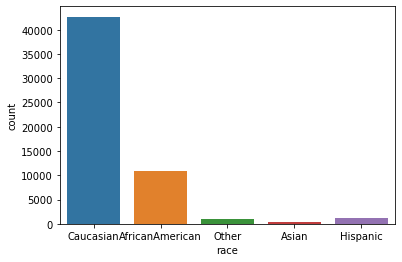

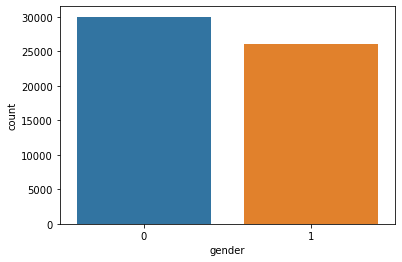

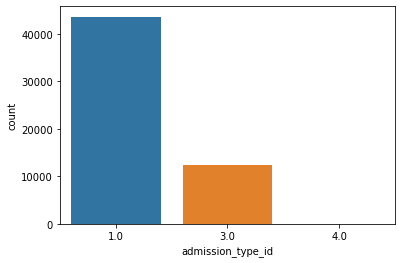

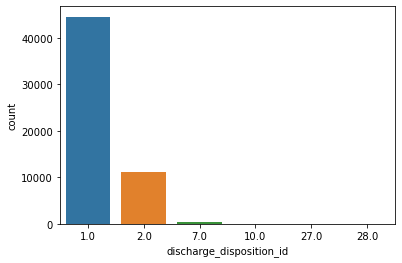

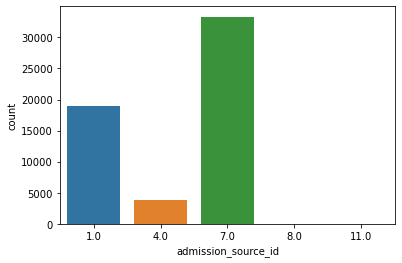

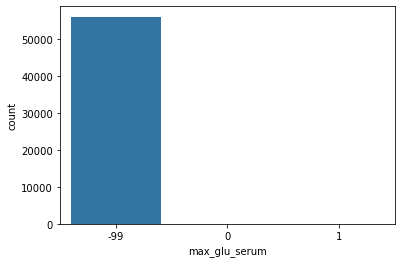

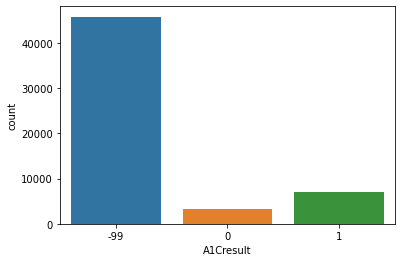

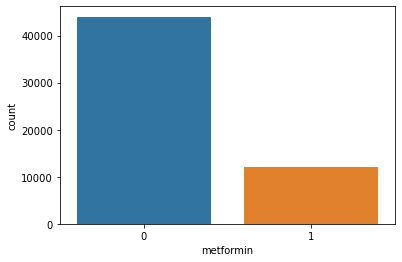

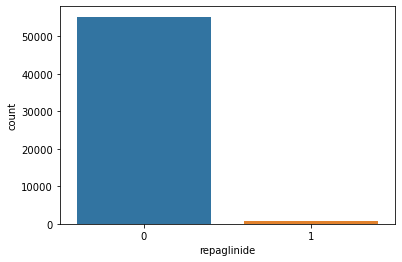

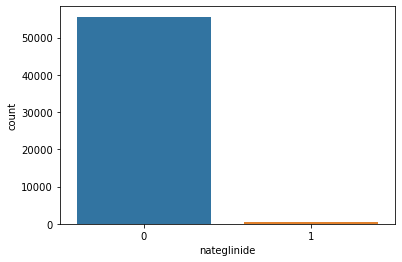

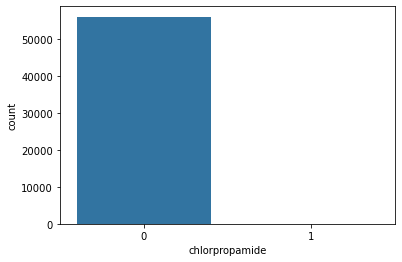

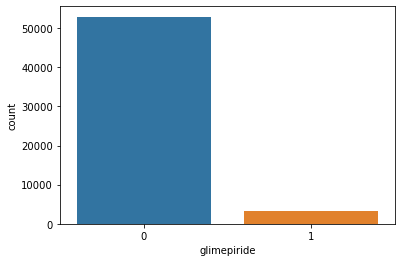

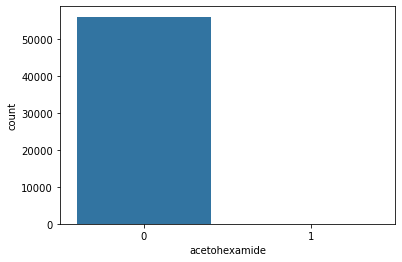

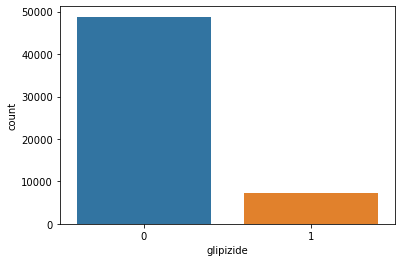

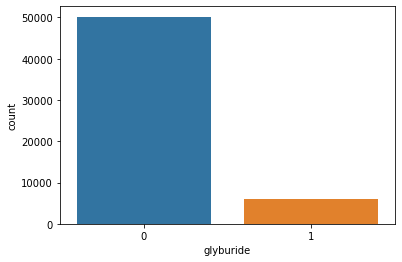

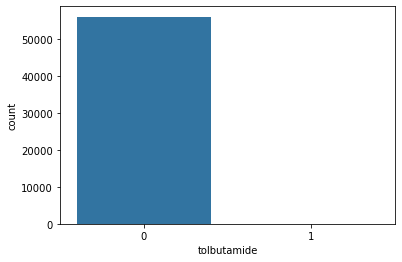

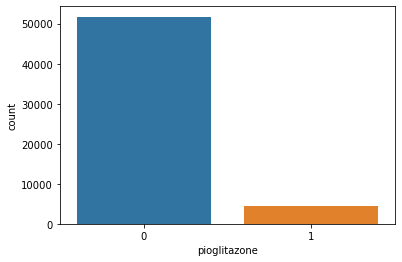

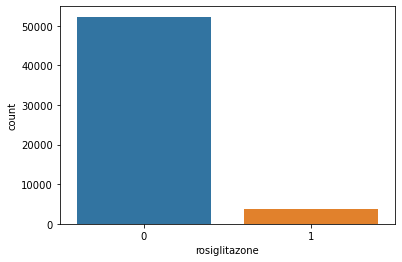

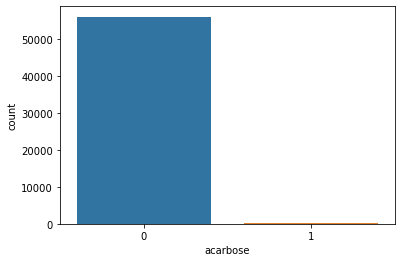

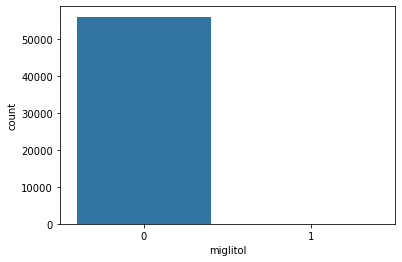

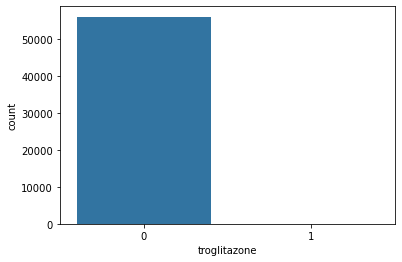

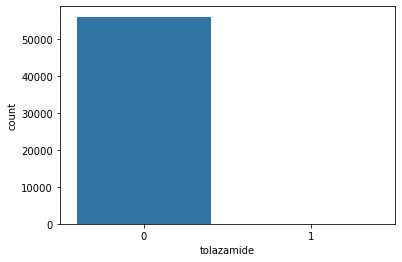

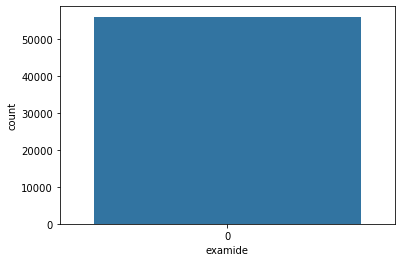

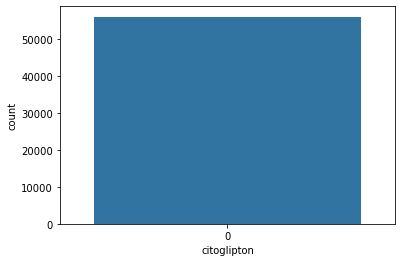

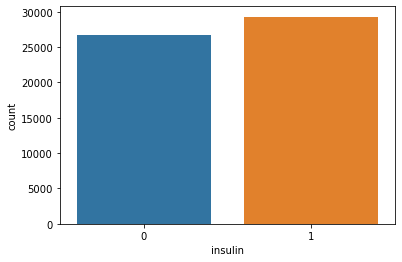

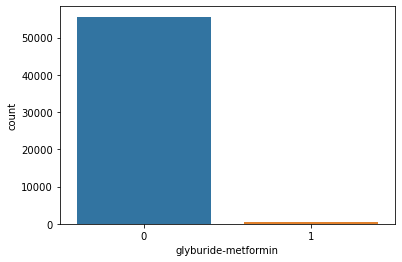

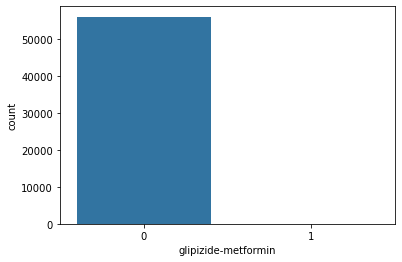

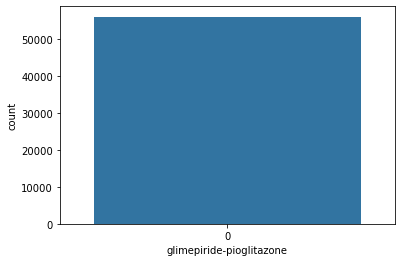

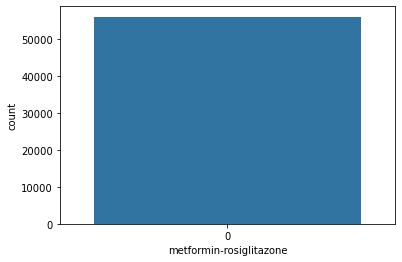

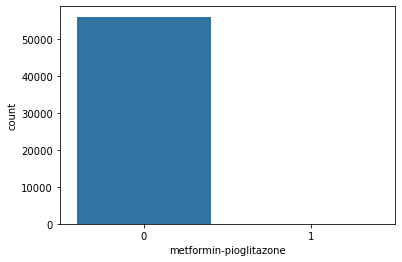

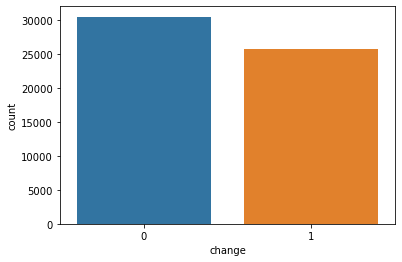

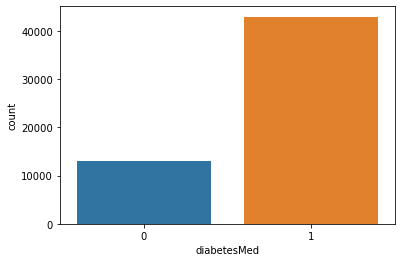

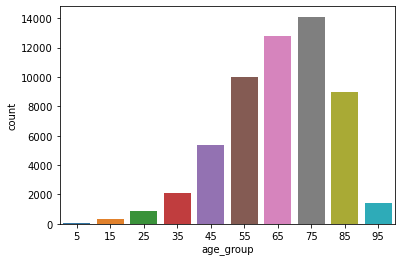

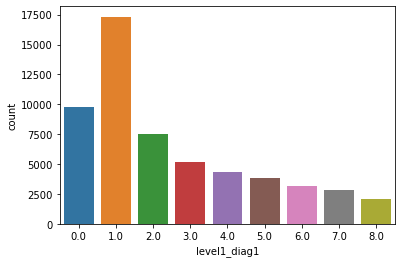

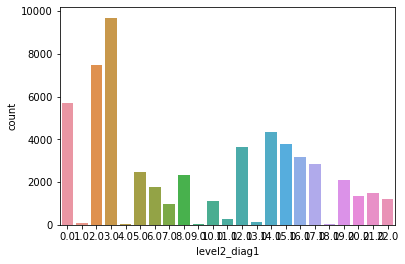

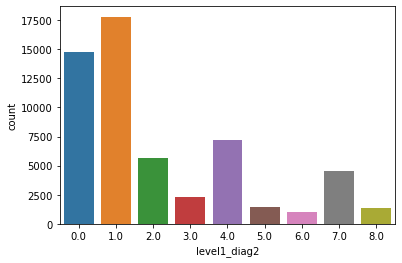

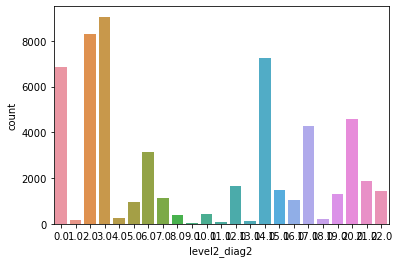

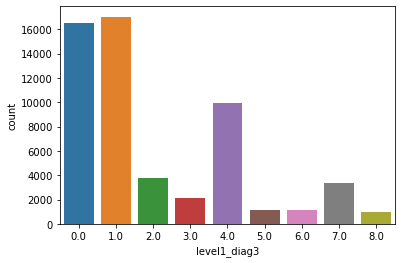

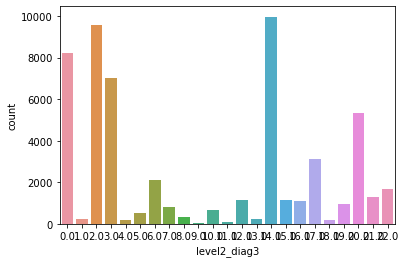

In [318]:
for col in df_cat.columns:
    sns.countplot(x =col, data = df)
    plt.show()

<AxesSubplot:xlabel='A1Cresult', ylabel='OUTPUT_LABEL'>

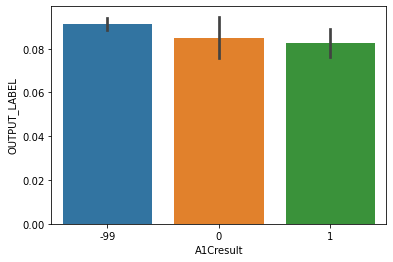

In [319]:
sns.barplot(df['A1Cresult'],df['OUTPUT_LABEL'])

### Statistical Analysis on Categorical data.

In [323]:
sig_col=[]
unsig_col=[]
for i in df_cat.columns:
    obs = pd.crosstab(df[i],df['OUTPUT_LABEL'])
    stat,pval,q,r=stats.chi2_contingency(obs)
    if pval<0.05:
        print(i,'--'*10,'significant')
        sig_col.append(i)
    else:
        print(i,'--'*10,'not significant')
        unsig_col.append(i)

race -------------------- significant
gender -------------------- not significant
admission_type_id -------------------- significant
discharge_disposition_id -------------------- significant
admission_source_id -------------------- not significant
max_glu_serum -------------------- not significant
A1Cresult -------------------- significant
metformin -------------------- significant
repaglinide -------------------- significant
nateglinide -------------------- not significant
chlorpropamide -------------------- not significant
glimepiride -------------------- not significant
acetohexamide -------------------- not significant
glipizide -------------------- significant
glyburide -------------------- not significant
tolbutamide -------------------- not significant
pioglitazone -------------------- not significant
rosiglitazone -------------------- not significant
acarbose -------------------- not significant
miglitol -------------------- not significant
troglitazone -------------------- not

In [324]:
sig_col

['race',
 'admission_type_id',
 'discharge_disposition_id',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'glipizide',
 'insulin',
 'change',
 'diabetesMed',
 'age_group',
 'level1_diag1',
 'level2_diag1',
 'level1_diag2',
 'level2_diag2',
 'level1_diag3',
 'level2_diag3']

In [325]:
unsig_col

['gender',
 'admission_source_id',
 'max_glu_serum',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

We only proceed with the significant columns.

In [327]:
final_cat_df = df[sig_col]

In [328]:
final_cat_df.head()

,race,admission_type_id,discharge_disposition_id,A1Cresult,metformin,repaglinide,glipizide,insulin,change,diabetesMed,age_group,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
1,Caucasian,1.0,1.0,-99,0,0,0,1,1,1,15,0.0,20.0,4.0,14.0,0.0,20.0
2,AfricanAmerican,1.0,1.0,-99,0,0,1,0,0,1,25,0.0,0.0,4.0,14.0,0.0,0.0
3,Caucasian,1.0,1.0,-99,0,0,0,1,1,1,35,0.0,0.0,4.0,14.0,1.0,2.0
4,Caucasian,1.0,1.0,-99,0,0,1,1,1,1,45,8.0,19.0,8.0,19.0,4.0,14.0
5,Caucasian,1.0,1.0,-99,0,0,0,1,0,1,55,1.0,2.0,1.0,2.0,4.0,14.0


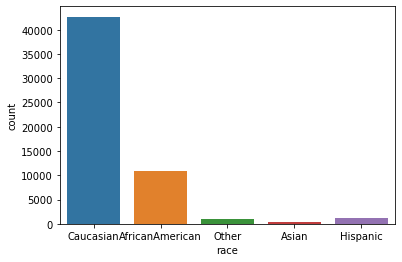

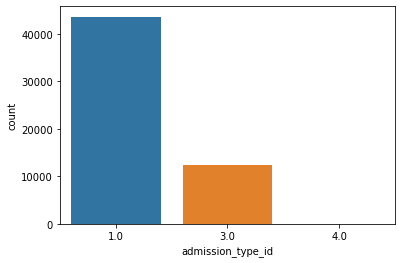

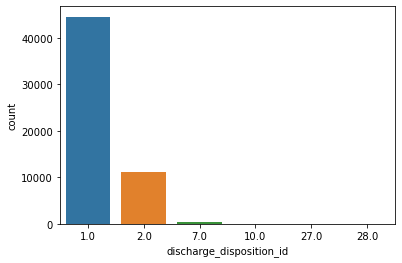

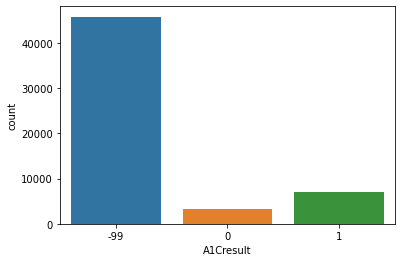

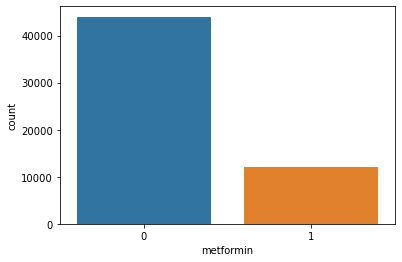

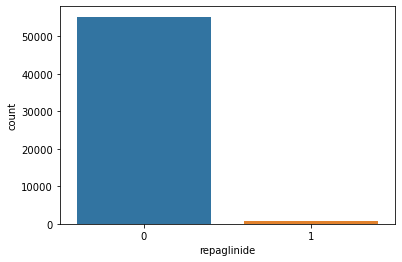

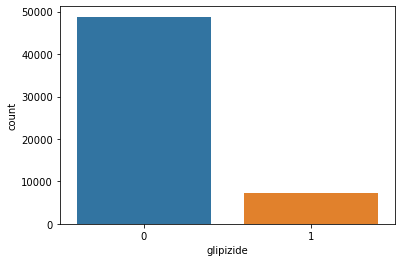

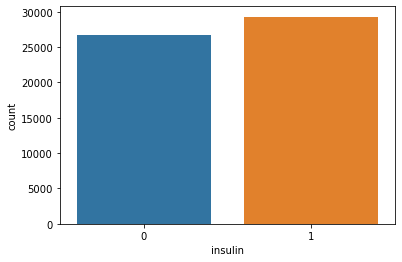

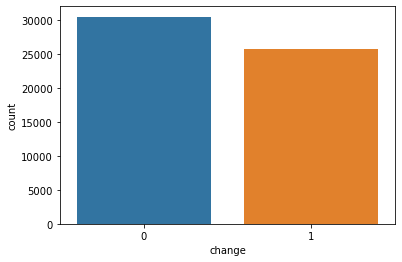

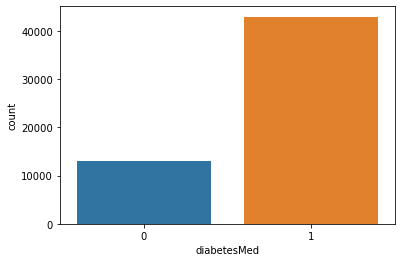

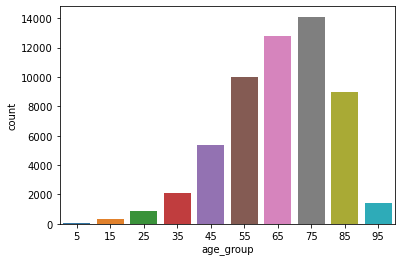

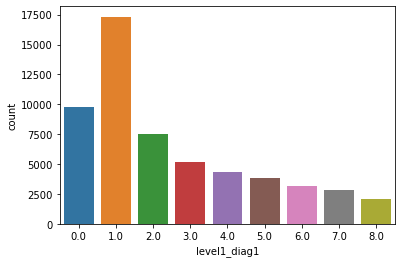

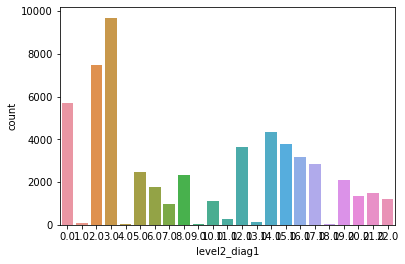

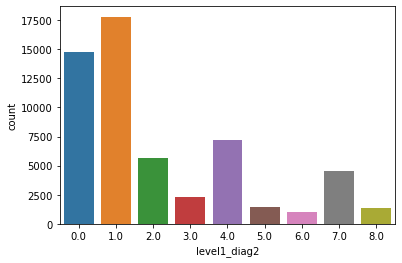

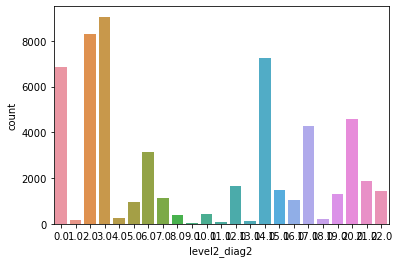

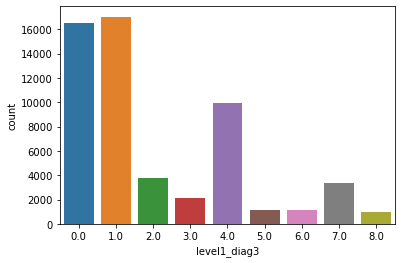

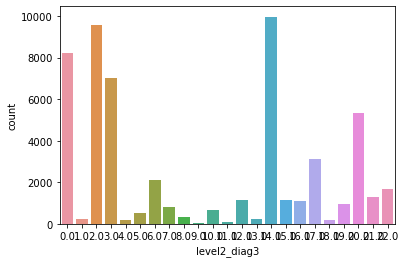

In [329]:
for col in final_cat_df.columns:
    sns.countplot(x =col, data = final_cat_df)
    plt.show()

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56086 entries, 1 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      56086 non-null  object
 1   gender                    56086 non-null  object
 2   admission_type_id         56086 non-null  object
 3   discharge_disposition_id  56086 non-null  object
 4   admission_source_id       56086 non-null  object
 5   time_in_hospital          56086 non-null  int64 
 6   num_lab_procedures        56086 non-null  int64 
 7   num_procedures            56086 non-null  int64 
 8   num_medications           56086 non-null  int64 
 9   number_outpatient         56086 non-null  int64 
 10  number_emergency          56086 non-null  int64 
 11  number_inpatient          56086 non-null  int64 
 12  number_diagnoses          56086 non-null  int64 
 13  max_glu_serum             56086 non-null  object
 14  A1Cresult            

### Numerical Columns:

In [339]:
df_num = df.select_dtypes(include=np.number)
df_num.drop(['OUTPUT_LABEL'],axis=1,inplace=True)

In [340]:
df_num.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'service_utilization',
       'numchange'],
      dtype='object')

<AxesSubplot:>

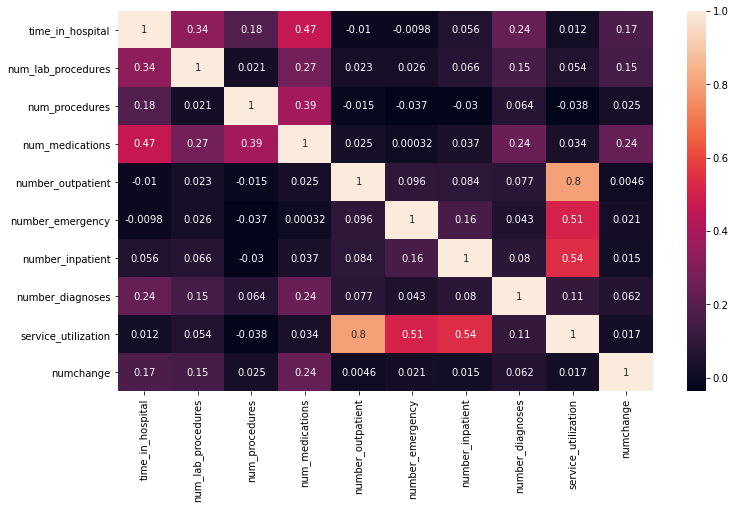

In [341]:
plt.figure(figsize=(12,7))
sns.heatmap(df_num.corr(),annot=True)

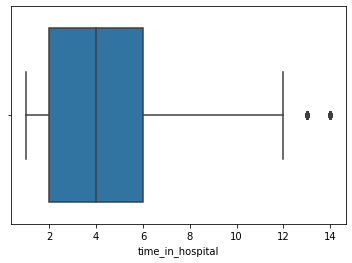

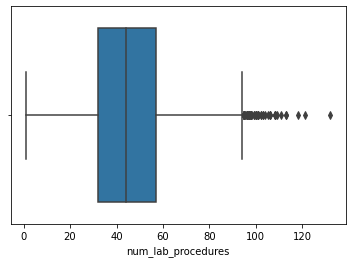

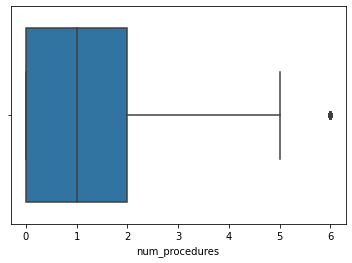

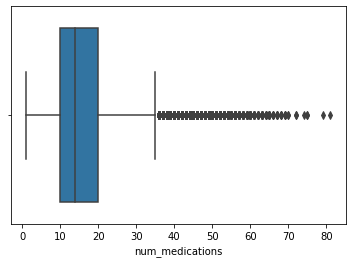

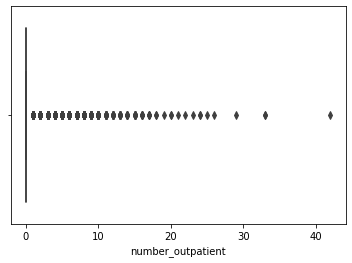

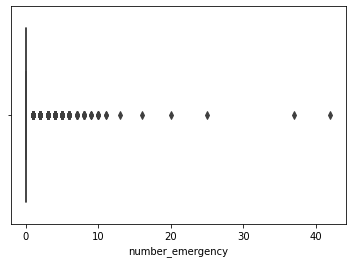

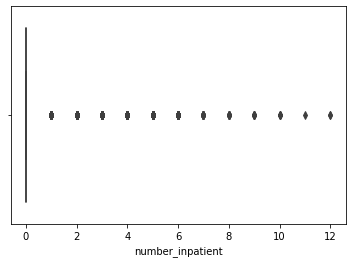

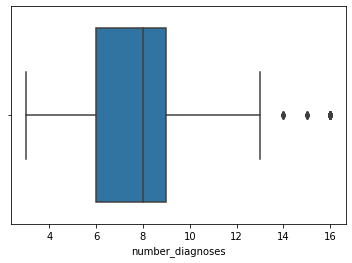

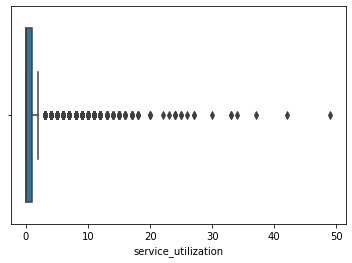

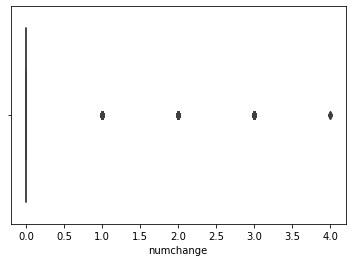

In [342]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

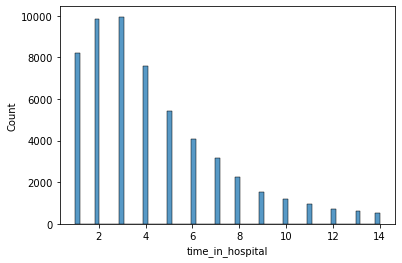

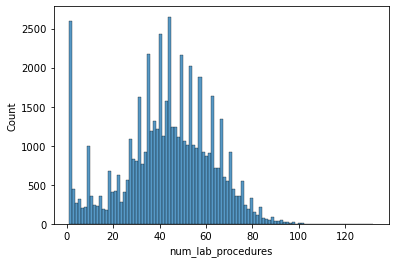

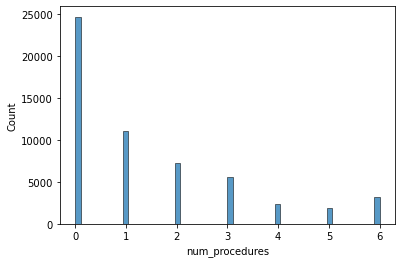

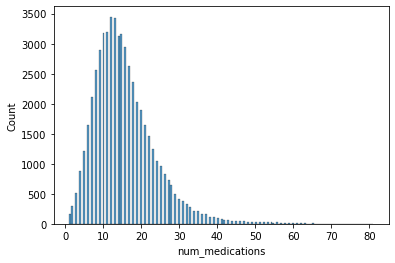

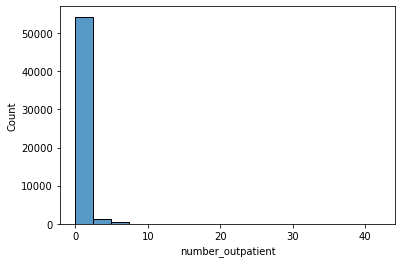

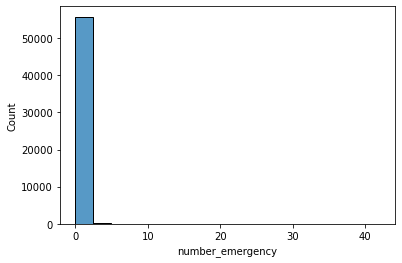

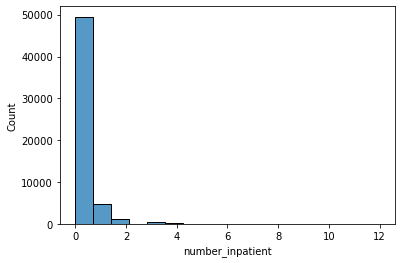

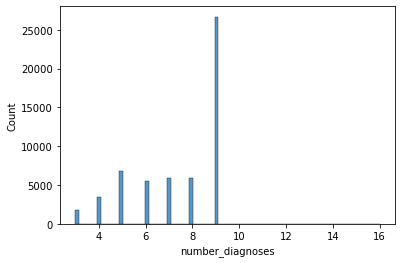

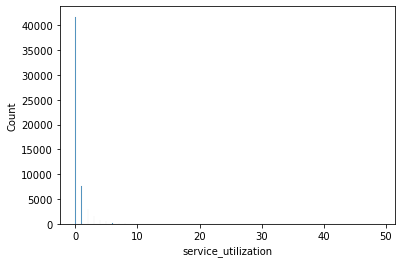

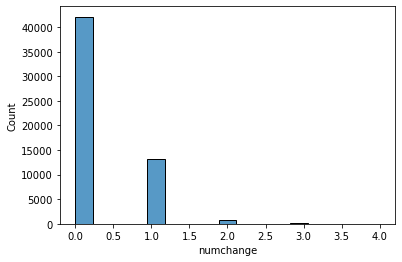

In [344]:
for col in df_num:
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    sns.histplot(x=col, data=df_num)

### Statistics for Numerical Data

In [345]:
sig_col=[]
unsig_col=[]
for i in df_num.columns:
    stat,pval=stats.ttest_ind(df[i],df['OUTPUT_LABEL'])
    if pval<0.05:
        print(i,'--'*10,'significant')
        sig_col.append(i)
    else:
        print(i,'--'*10,'not significant')
        unsig_col.append(i)

time_in_hospital -------------------- significant
num_lab_procedures -------------------- significant
num_procedures -------------------- significant
num_medications -------------------- significant
number_outpatient -------------------- significant
number_emergency -------------------- significant
number_inpatient -------------------- significant
number_diagnoses -------------------- significant
service_utilization -------------------- significant
numchange -------------------- significant


In [346]:
sig_col

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'service_utilization',
 'numchange']

In [347]:
unsig_col

[]

All columns are significant

In [348]:
# Multicollinearity

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features']=df_num.columns
vif.sort_values(['VIF'],ascending=False)

,VIF,Features
4,inf,number_outpatient
5,inf,number_emergency
6,inf,number_inpatient
8,inf,service_utilization
7,7.263959,number_diagnoses
3,7.214335,num_medications
1,6.094881,num_lab_procedures
0,4.375965,time_in_hospital
2,1.976605,num_procedures
9,1.405910,numchange


In [349]:
df_num.drop(['number_outpatient'],axis=1,inplace=True)

In [350]:

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features']=df_num.columns
vif.sort_values(['VIF'],ascending=False)

,VIF,Features
6,7.263959,number_diagnoses
3,7.214335,num_medications
1,6.094881,num_lab_procedures
0,4.375965,time_in_hospital
7,2.202545,service_utilization
2,1.976605,num_procedures
5,1.576605,number_inpatient
4,1.446691,number_emergency
8,1.405910,numchange


In [356]:
df_num.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses,service_utilization,numchange
1,3,59,0,18,0,0,9,0,1
2,2,11,5,13,0,1,6,3,0
3,2,44,1,16,0,0,7,0,1
4,1,51,0,8,0,0,5,0,0
5,3,31,6,16,0,0,9,0,0


<AxesSubplot:ylabel='Density'>

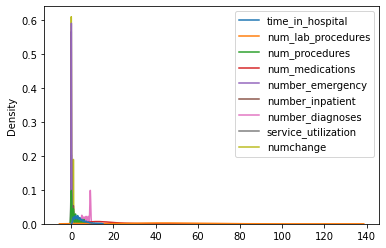

In [358]:
sns.kdeplot(data=df_num)

In [359]:
df_num.skew()

time_in_hospital        1.175726
num_lab_procedures     -0.293817
num_procedures          1.220548
num_medications         1.461496
number_emergency       22.076891
number_inpatient        5.666994
number_diagnoses       -0.721332
service_utilization     6.716630
numchange               1.603977
dtype: float64

In [388]:
df_num.shape

(56086, 9)

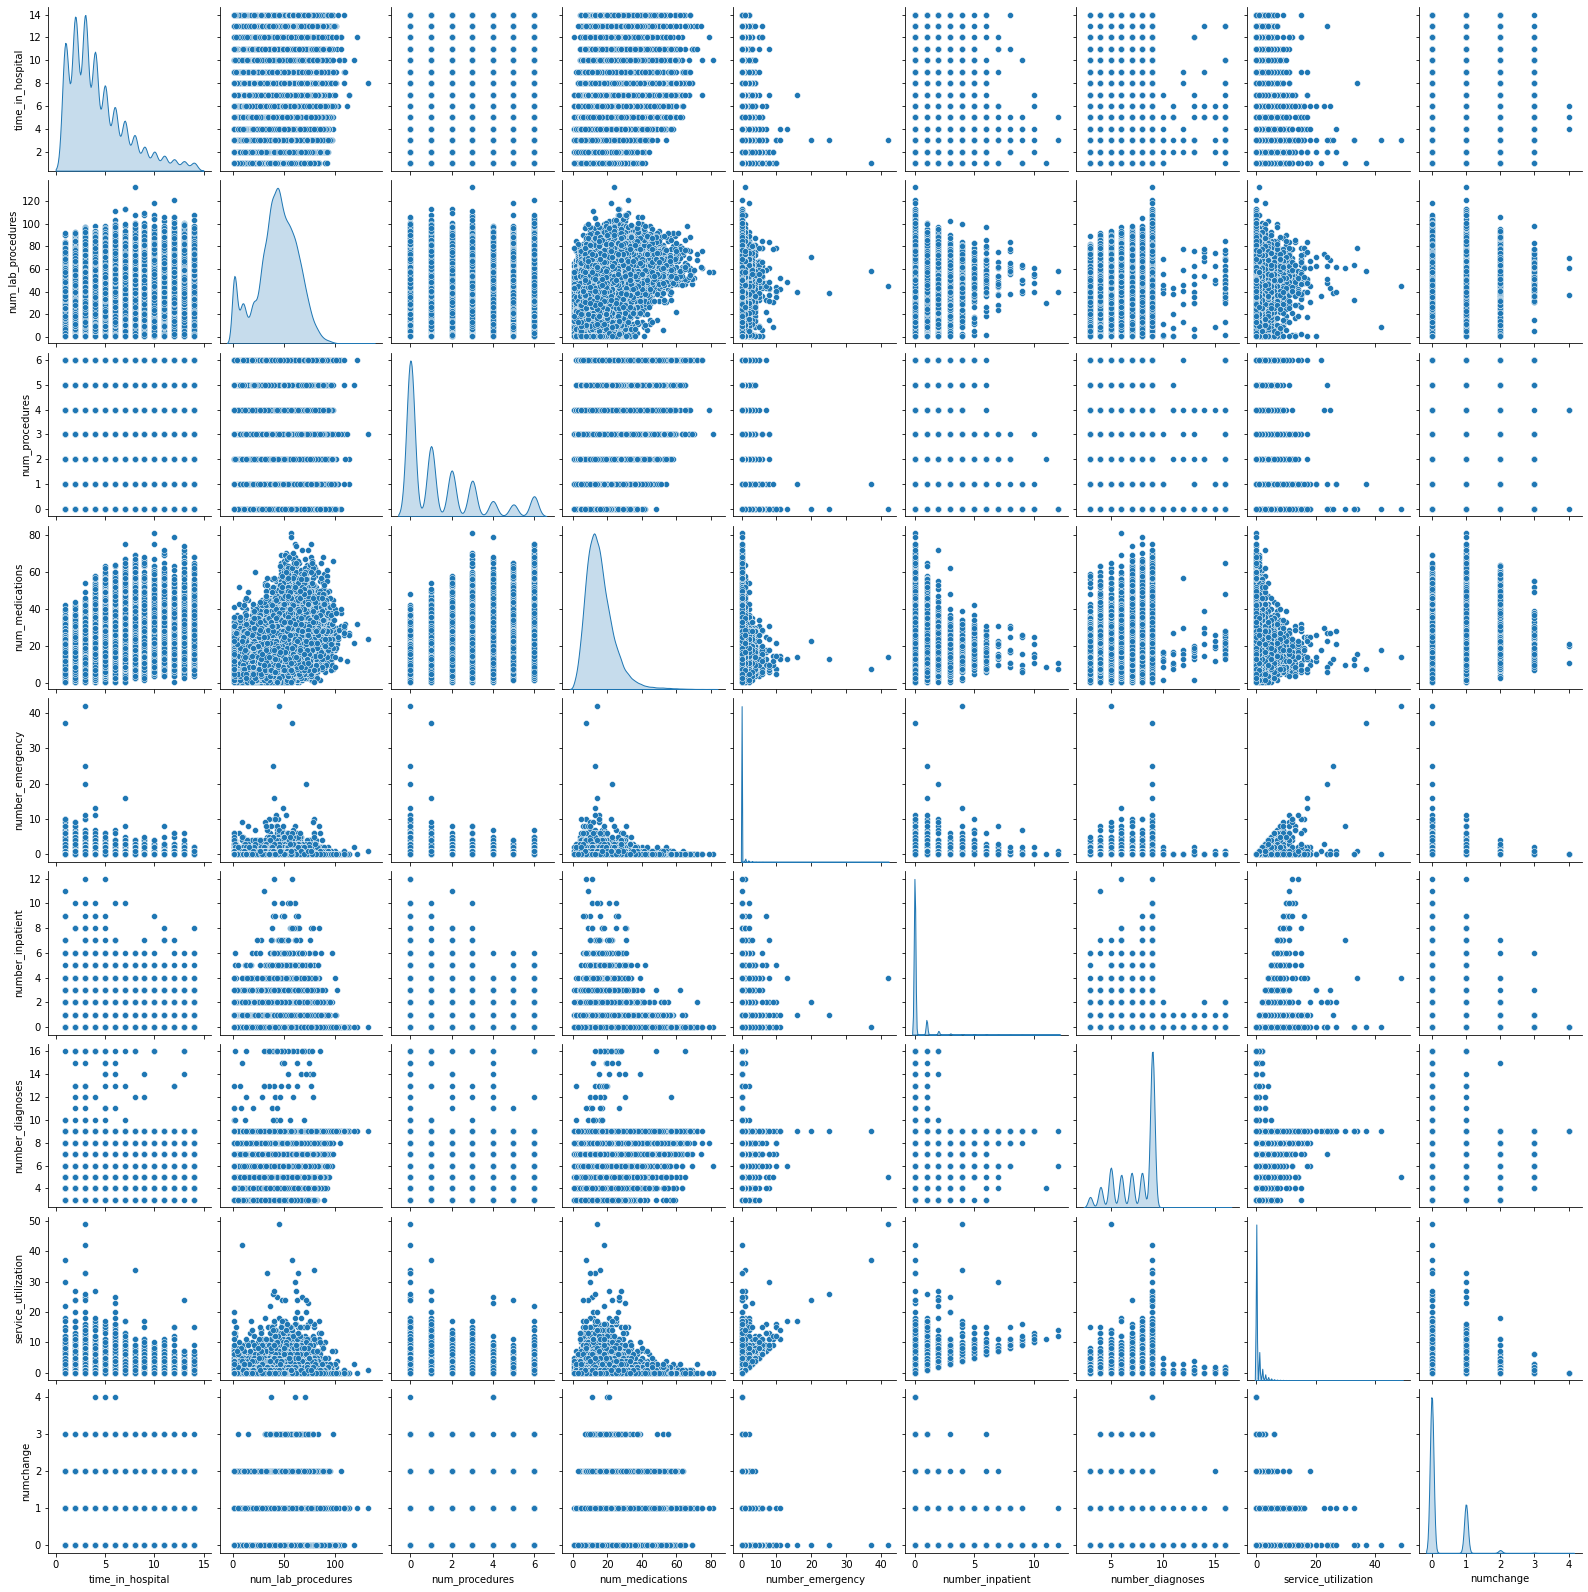

In [534]:
sns.pairplot(df_num,diag_kind='kde')

In [361]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3 - Q1

fence_low  = Q1-1.5*IQR
fence_high = Q3+1.5*IQR

df_num_new = df_num[(df_num > fence_low) & (df_num < fence_high)]

In [362]:
df_num_new.skew()

time_in_hospital       0.885082
num_lab_procedures    -0.325986
num_procedures         0.946550
num_medications        0.532437
number_emergency            NaN
number_inpatient            NaN
number_diagnoses      -0.782668
service_utilization    2.031233
numchange                   NaN
dtype: float64

<AxesSubplot:ylabel='Density'>

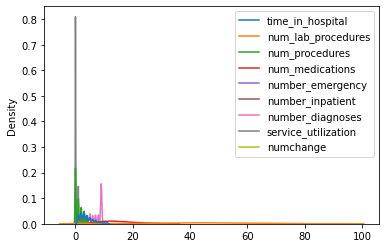

In [363]:
sns.kdeplot(data=df_num_new)

In [367]:
df_num.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses,service_utilization,numchange
count,56086.000000,56086.000000,56086.000000,56086.000000,56086.000000,56086.000000,56086.000000,56086.000000,56086.000000
mean,4.284581,43.215223,1.434012,15.696074,0.109368,0.175891,7.412224,0.554131,0.264879
std,2.929996,19.691940,1.764130,8.248450,0.538260,0.600048,1.882325,1.437542,0.478902
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,9.000000,1.000000,0.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,12.000000,16.000000,49.000000,4.000000


In [368]:
z_scores = stats.zscore(df_num)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df_num = df_num[filtered_entries]

In [369]:
new_df_num.skew()

time_in_hospital       1.120662
num_lab_procedures    -0.291041
num_procedures         1.253582
num_medications        0.765290
number_emergency       3.950294
number_inpatient       3.060342
number_diagnoses      -0.732141
service_utilization    2.806990
numchange              1.292483
dtype: float64

Outliers are removed with the help of z_scores.

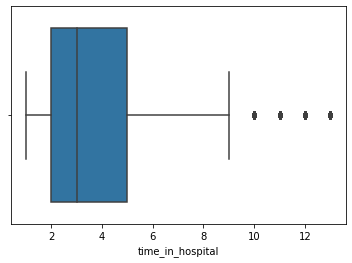

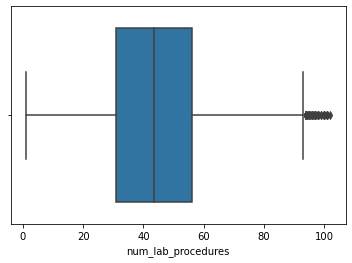

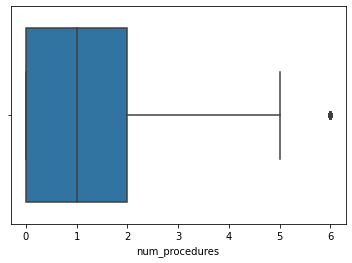

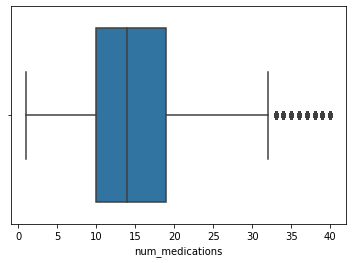

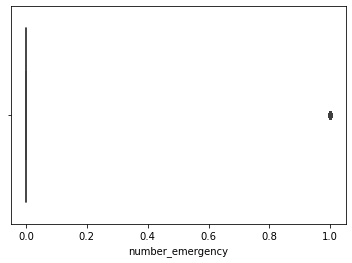

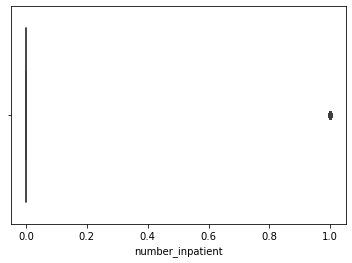

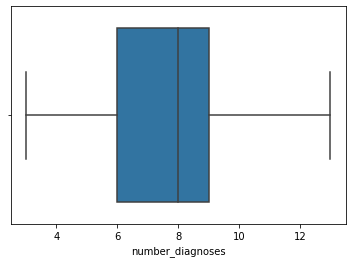

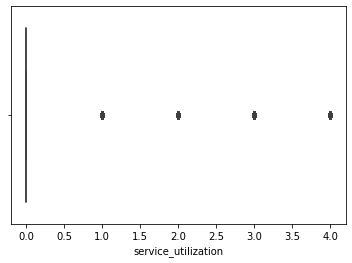

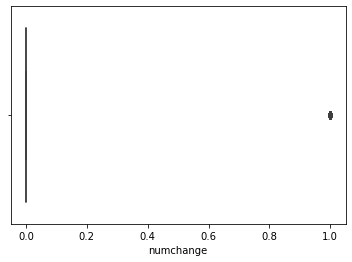

In [370]:
for i in new_df_num.columns:
    sns.boxplot(new_df_num[i])
    plt.show()

In [389]:
new_df_num.shape

(50800, 9)

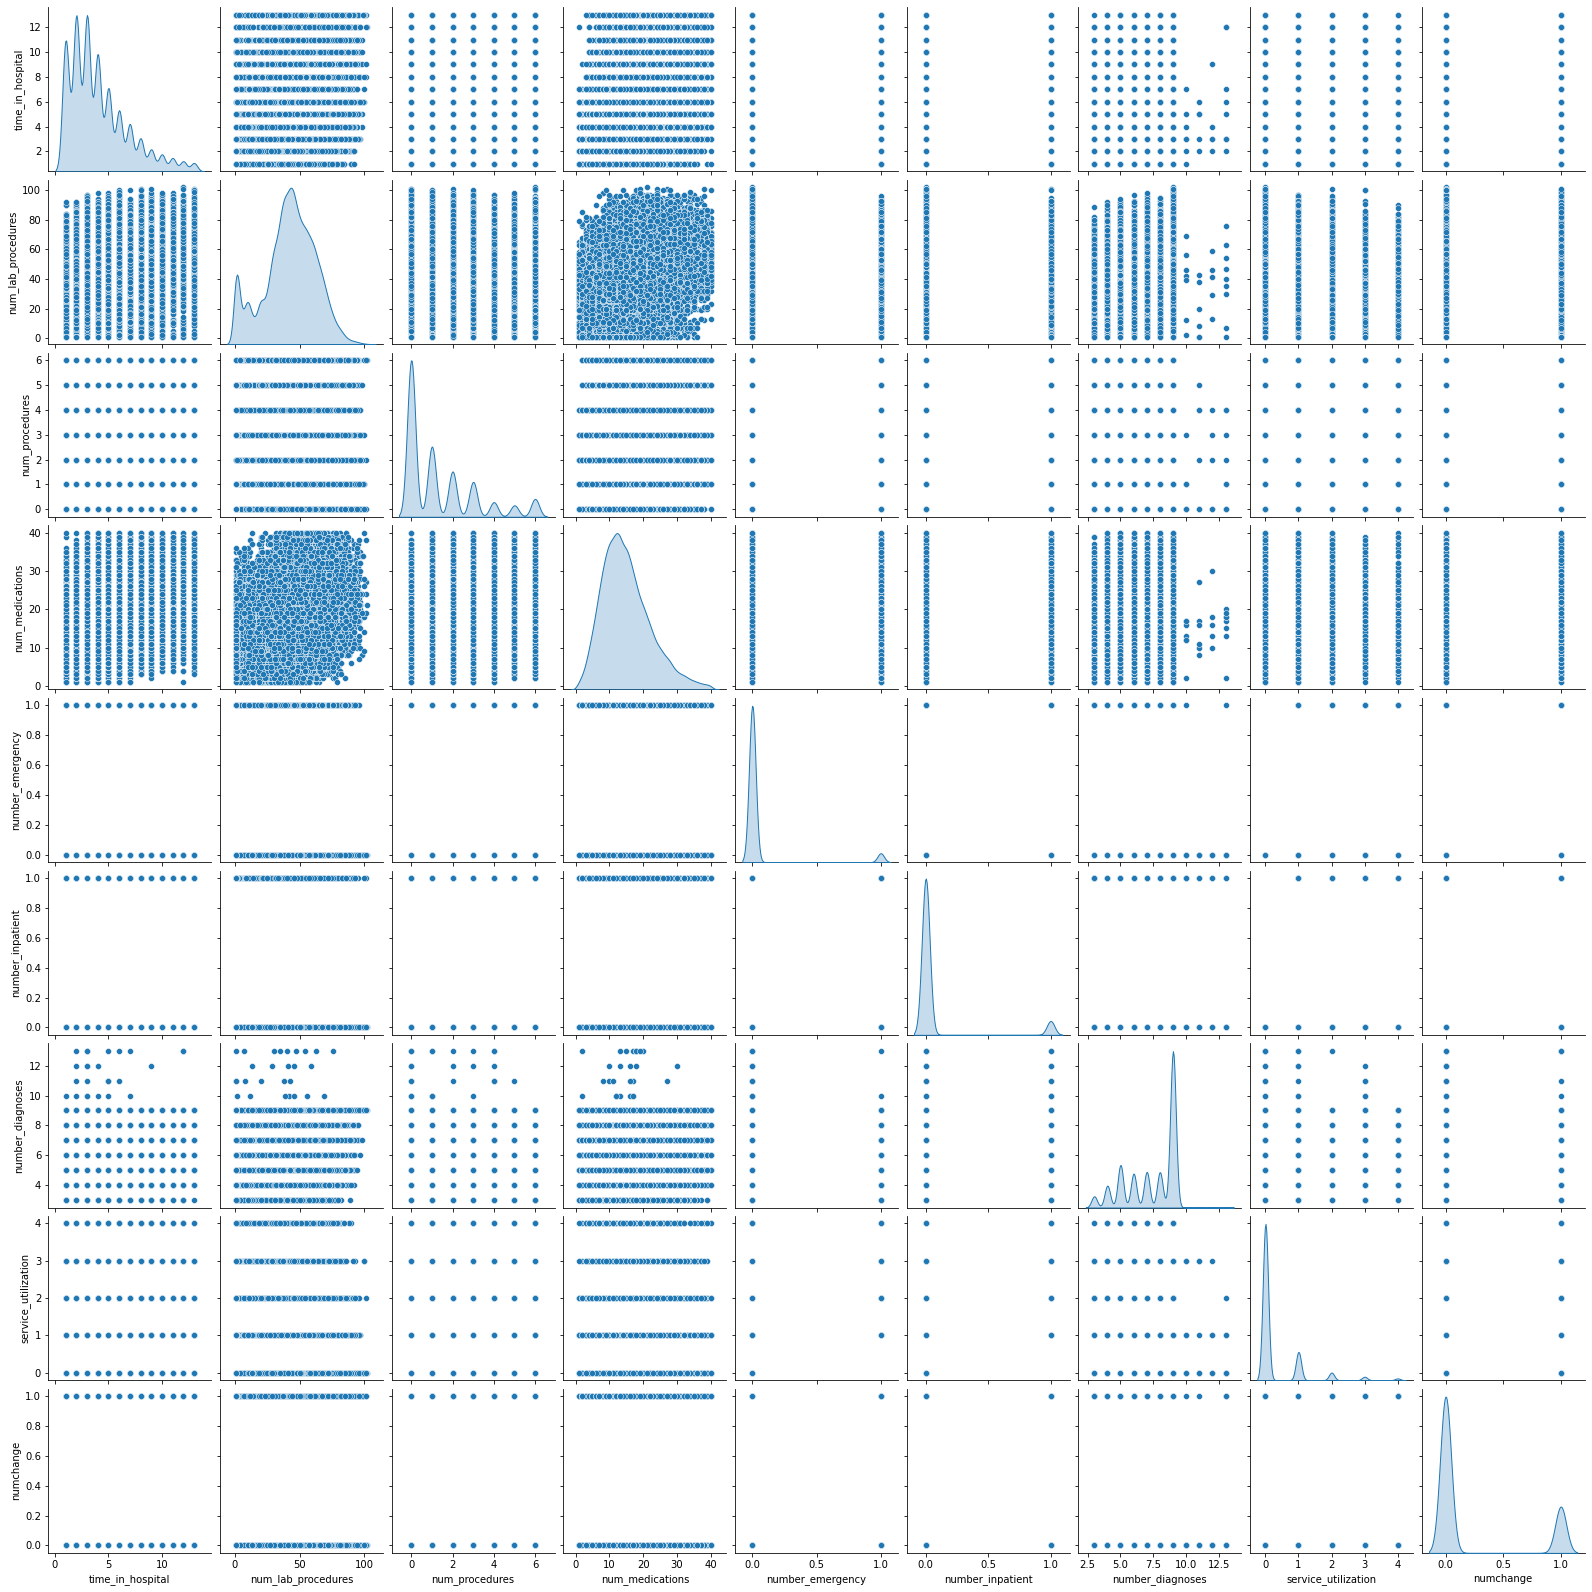

In [535]:
sns.pairplot(new_df_num,diag_kind='kde')

In [537]:
sns.kdeplot(new_df_num)

ValueError: If using all scalar values, you must pass an index

## Encoding:

In [352]:
df_cat.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,age_group,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
1,Caucasian,0,1.0,1.0,7.0,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,15,0.0,20.0,4.0,14.0,0.0,20.0
2,AfricanAmerican,0,1.0,1.0,7.0,-99,-99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,4.0,14.0,0.0,0.0
3,Caucasian,1,1.0,1.0,7.0,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,35,0.0,0.0,4.0,14.0,1.0,2.0
4,Caucasian,1,1.0,1.0,7.0,-99,-99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,45,8.0,19.0,8.0,19.0,4.0,14.0
5,Caucasian,1,1.0,1.0,1.0,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,55,1.0,2.0,1.0,2.0,4.0,14.0


In [353]:
df_cat.shape

(56086, 39)

In [354]:
df_cat = pd.get_dummies(df_cat,drop_first=True)

In [355]:
df_cat.shape

(56086, 140)

## Final Data

In [371]:
df_data = pd.concat([new_df_num,df_cat,df['OUTPUT_LABEL']],axis=1)

In [372]:
df_data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses,service_utilization,numchange,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,admission_type_id_3.0,admission_type_id_4.0,discharge_disposition_id_2.0,discharge_disposition_id_7.0,discharge_disposition_id_10.0,discharge_disposition_id_27.0,discharge_disposition_id_28.0,admission_source_id_4.0,admission_source_id_7.0,admission_source_id_8.0,admission_source_id_11.0,max_glu_serum_0,max_glu_serum_1,A1Cresult_0,A1Cresult_1,metformin_1,repaglinide_1,nateglinide_1,chlorpropamide_1,glimepiride_1,acetohexamide_1,glipizide_1,glyburide_1,tolbutamide_1,pioglitazone_1,rosiglitazone_1,acarbose_1,miglitol_1,troglitazone_1,tolazamide_1,insulin_1,glyburide-metformin_1,glipizide-metformin_1,metformin-pioglitazone_1,change_1,diabetesMed_1,age_group_15,age_group_25,age_group_35,age_group_45,age_group_55,age_group_65,age_group_75,age_group_85,age_group_95,level1_diag1_1.0,level1_diag1_2.0,level1_diag1_3.0,level1_diag1_4.0,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0,level2_diag1_1.0,level2_diag1_2.0,level2_diag1_3.0,level2_diag1_4.0,level2_diag1_5.0,level2_diag1_6.0,level2_diag1_7.0,level2_diag1_8.0,level2_diag1_9.0,level2_diag1_10.0,level2_diag1_11.0,level2_diag1_12.0,level2_diag1_13.0,level2_diag1_14.0,level2_diag1_15.0,level2_diag1_16.0,level2_diag1_17.0,level2_diag1_18.0,level2_diag1_19.0,level2_diag1_20.0,level2_diag1_21.0,level2_diag1_22.0,level1_diag2_1.0,level1_diag2_2.0,level1_diag2_3.0,level1_diag2_4.0,level1_diag2_5.0,level1_diag2_6.0,level1_diag2_7.0,level1_diag2_8.0,level2_diag2_1.0,level2_diag2_2.0,level2_diag2_3.0,level2_diag2_4.0,level2_diag2_5.0,level2_diag2_6.0,level2_diag2_7.0,level2_diag2_8.0,level2_diag2_9.0,level2_diag2_10.0,level2_diag2_11.0,level2_diag2_12.0,level2_diag2_13.0,level2_diag2_14.0,level2_diag2_15.0,level2_diag2_16.0,level2_diag2_17.0,level2_diag2_18.0,level2_diag2_19.0,level2_diag2_20.0,level2_diag2_21.0,level2_diag2_22.0,level1_diag3_1.0,level1_diag3_2.0,level1_diag3_3.0,level1_diag3_4.0,level1_diag3_5.0,level1_diag3_6.0,level1_diag3_7.0,level1_diag3_8.0,level2_diag3_1.0,level2_diag3_2.0,level2_diag3_3.0,level2_diag3_4.0,level2_diag3_5.0,level2_diag3_6.0,level2_diag3_7.0,level2_diag3_8.0,level2_diag3_9.0,level2_diag3_10.0,level2_diag3_11.0,level2_diag3_12.0,level2_diag3_13.0,level2_diag3_14.0,level2_diag3_15.0,level2_diag3_16.0,level2_diag3_17.0,level2_diag3_18.0,level2_diag3_19.0,level2_diag3_20.0,level2_diag3_21.0,level2_diag3_22.0,OUTPUT_LABEL
1,3.0,59.0,0.0,18.0,0.0,0.0,9.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.0,11.0,5.0,13.0,0.0,1.0,6.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,44.0,1.0,16.0,0.0,0.0,7.0,0.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,51.0,0.0,8.0,0.0,0.0,5.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,3.0,31.0,6.0,16.0,0.0,0.0,9.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,

In [390]:
df_data.dropna(inplace=True)

In [391]:
df_data.shape

(50800, 150)

<AxesSubplot:>

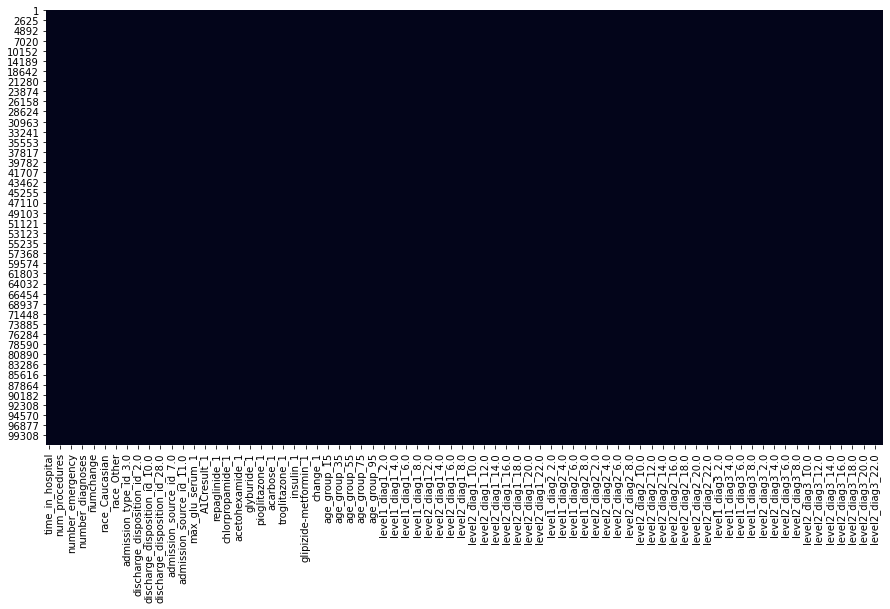

In [392]:
plt.figure(figsize=(15,8))
sns.heatmap(df_data.isnull(),cbar=False)

In [393]:
df_data.isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_emergency      0
                     ..
level2_diag3_19.0     0
level2_diag3_20.0     0
level2_diag3_21.0     0
level2_diag3_22.0     0
OUTPUT_LABEL          0
Length: 150, dtype: int64

# Spliting & Scaling

In [394]:
df_data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses,service_utilization,numchange,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,admission_type_id_3.0,admission_type_id_4.0,discharge_disposition_id_2.0,discharge_disposition_id_7.0,discharge_disposition_id_10.0,discharge_disposition_id_27.0,discharge_disposition_id_28.0,admission_source_id_4.0,admission_source_id_7.0,admission_source_id_8.0,admission_source_id_11.0,max_glu_serum_0,max_glu_serum_1,A1Cresult_0,A1Cresult_1,metformin_1,repaglinide_1,nateglinide_1,chlorpropamide_1,glimepiride_1,acetohexamide_1,glipizide_1,glyburide_1,tolbutamide_1,pioglitazone_1,rosiglitazone_1,acarbose_1,miglitol_1,troglitazone_1,tolazamide_1,insulin_1,glyburide-metformin_1,glipizide-metformin_1,metformin-pioglitazone_1,change_1,diabetesMed_1,age_group_15,age_group_25,age_group_35,age_group_45,age_group_55,age_group_65,age_group_75,age_group_85,age_group_95,level1_diag1_1.0,level1_diag1_2.0,level1_diag1_3.0,level1_diag1_4.0,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0,level2_diag1_1.0,level2_diag1_2.0,level2_diag1_3.0,level2_diag1_4.0,level2_diag1_5.0,level2_diag1_6.0,level2_diag1_7.0,level2_diag1_8.0,level2_diag1_9.0,level2_diag1_10.0,level2_diag1_11.0,level2_diag1_12.0,level2_diag1_13.0,level2_diag1_14.0,level2_diag1_15.0,level2_diag1_16.0,level2_diag1_17.0,level2_diag1_18.0,level2_diag1_19.0,level2_diag1_20.0,level2_diag1_21.0,level2_diag1_22.0,level1_diag2_1.0,level1_diag2_2.0,level1_diag2_3.0,level1_diag2_4.0,level1_diag2_5.0,level1_diag2_6.0,level1_diag2_7.0,level1_diag2_8.0,level2_diag2_1.0,level2_diag2_2.0,level2_diag2_3.0,level2_diag2_4.0,level2_diag2_5.0,level2_diag2_6.0,level2_diag2_7.0,level2_diag2_8.0,level2_diag2_9.0,level2_diag2_10.0,level2_diag2_11.0,level2_diag2_12.0,level2_diag2_13.0,level2_diag2_14.0,level2_diag2_15.0,level2_diag2_16.0,level2_diag2_17.0,level2_diag2_18.0,level2_diag2_19.0,level2_diag2_20.0,level2_diag2_21.0,level2_diag2_22.0,level1_diag3_1.0,level1_diag3_2.0,level1_diag3_3.0,level1_diag3_4.0,level1_diag3_5.0,level1_diag3_6.0,level1_diag3_7.0,level1_diag3_8.0,level2_diag3_1.0,level2_diag3_2.0,level2_diag3_3.0,level2_diag3_4.0,level2_diag3_5.0,level2_diag3_6.0,level2_diag3_7.0,level2_diag3_8.0,level2_diag3_9.0,level2_diag3_10.0,level2_diag3_11.0,level2_diag3_12.0,level2_diag3_13.0,level2_diag3_14.0,level2_diag3_15.0,level2_diag3_16.0,level2_diag3_17.0,level2_diag3_18.0,level2_diag3_19.0,level2_diag3_20.0,level2_diag3_21.0,level2_diag3_22.0,OUTPUT_LABEL
1,3.0,59.0,0.0,18.0,0.0,0.0,9.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.0,11.0,5.0,13.0,0.0,1.0,6.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,44.0,1.0,16.0,0.0,0.0,7.0,0.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,51.0,0.0,8.0,0.0,0.0,5.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,3.0,31.0,6.0,16.0,0.0,0.0,9.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,

In [395]:
df_target = df_data['OUTPUT_LABEL']

In [396]:
X = df_data.drop('OUTPUT_LABEL',axis=1)

In [397]:
y=df_data['OUTPUT_LABEL']

In [398]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [399]:
sc  = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns)

In [400]:
print('X_train', X_train_sc.shape)
print('y_train', y_train.shape)

print('X_test', X_test_sc.shape)
print('y_test', y_test.shape)

X_train (35560, 149)
y_train (35560,)
X_test (15240, 149)
y_test (15240,)


In [428]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train_sc, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 32586, 1: 2974})
New dataset shape Counter({0: 32586, 1: 32586})


In [429]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

# Modelling

Defining function for training model:

In [401]:
def get_train_report(model, X_train):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

Defining Function for test model:

In [539]:
scorecard=pd.DataFrame(columns=['Model','tn','fp','fn','tp','Precision','Recall','F1_score','AUC','Train_Accuracy','Test_Accuracy','Kappa_score'])
def model_evaluation(model_name,classifier,X_train,y_train,X_test,y_test):
    
    # traing data 
    model=classifier.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    print('Performance of the model on Training Data:\n')
    print('Confusion matrix:\n')
    print(confusion_matrix(y_train,y_train_pred))
    print()
    print('Classification report:\n')
    print(classification_report(y_train,y_train_pred))
    print()
    #testing data
    y_test_pred=model.predict(X_test)
    print('Performance of the model on testing Data:\n')
    print('Confusion matrix:\n')
    print(confusion_matrix(y_test,y_test_pred))
    print()
    print('Classification report:\n')
    print(classification_report(y_test,y_test_pred))
    print()
    Train_accuracy=model.score(X_train,y_train)
    Test_accuracy=model.score(X_test,y_test)
    print('Training Accuracy:',Train_accuracy)
    print('Testing Accuracy:',Test_accuracy)
    
    tn,fp,fn,tp=confusion_matrix(y_test,y_test_pred).flatten()
    
    print()
    print('ROC AUC graph:')
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred)
    area=auc(fpr,tpr)
    pl.plot(fpr,tpr,label='Area under curve: (area = %0.2f)' % area)
    pl.plot([0,1],[0,1],'k--')
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.xlim([0,1])
    pl.ylim([0,1])
    plt.legend('lower right')
    plt.show()
    
    global scorecard
    scorecard=scorecard.append({'Model':model_name
                               ,'tn':tn
                               ,'fp':fp
                               ,'fn':fn
                               ,'tp':tp
                               ,'Precision':precision_score(y_test,y_test_pred)
                               ,'Recall':recall_score(y_test,y_test_pred)
                               ,'F1_score':f1_score(y_test,y_test_pred)
                               ,'AUC':roc_auc_score(y_test,y_test_pred)
                               ,'Train_Accuracy':Train_accuracy
                               ,'Test_Accuracy':Test_accuracy
                               ,'Kappa_score':cohen_kappa_score(y_test,y_test_pred)},ignore_index=True
                              )

In [538]:
def get_test_report(model, test_data):
    test_pred = model.predict(test_data)
    print(classification_report(y_test, test_pred))

In [588]:
scorecard=pd.DataFrame(columns=['Model','tn','fp','fn','tp','Precision','Recall','F1_score','AUC','Train_Accuracy','Test_Accuracy','Kappa_score'])

Define a function to plot the confusion matrix.

In [403]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [404]:
def plot_confusion_matrix_train(model, train_data):
    
    # predict the target values using X_test
    y_pred = model.predict(train_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_train, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

Define a function to plot the ROC curve.

In [405]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data,color):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr,c=color)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

# KNN Classifier

In [430]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn_model = knn.fit(X_train, y_train)

In [431]:
train_report=get_train_report(knn_model,X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.85      0.20      0.33     26095
           1       0.55      0.96      0.70     26042

    accuracy                           0.58     52137
   macro avg       0.70      0.58      0.51     52137
weighted avg       0.70      0.58      0.51     52137



In [503]:
test_report = get_test_report(knn_model, test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.19      0.30      6491
           1       0.54      0.96      0.69      6544

    accuracy                           0.57     13035
   macro avg       0.68      0.57      0.50     13035
weighted avg       0.68      0.57      0.50     13035

None


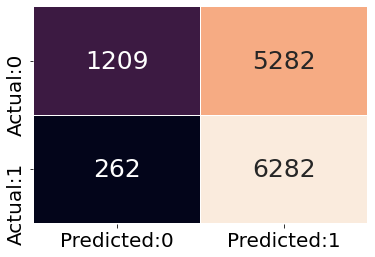

In [434]:
plot_confusion_matrix(knn_model, test_data = X_test)

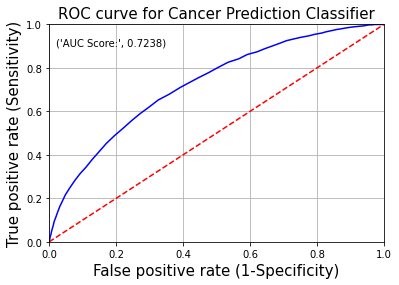

In [436]:
plot_roc(knn_model, test_data = X_test,color='b')

Performance of the model on Training Data:

Confusion matrix:

[[ 5306 20789]
 [  942 25100]]

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.20      0.33     26095
           1       0.55      0.96      0.70     26042

    accuracy                           0.58     52137
   macro avg       0.70      0.58      0.51     52137
weighted avg       0.70      0.58      0.51     52137


Performance of the model on testing Data:

Confusion matrix:

[[1209 5282]
 [ 262 6282]]

Classification report:

              precision    recall  f1-score   support

           0       0.82      0.19      0.30      6491
           1       0.54      0.96      0.69      6544

    accuracy                           0.57     13035
   macro avg       0.68      0.57      0.50     13035
weighted avg       0.68      0.57      0.50     13035


Training Accuracy: 0.5831942766173734
Testing Accuracy: 0.5746835443037974

ROC AUC graph:


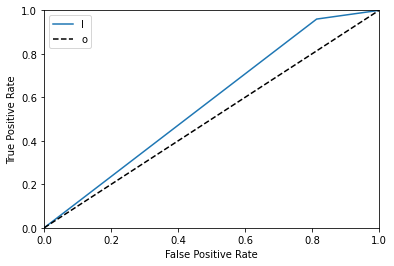

In [590]:
knn=KNeighborsClassifier(n_neighbors = 100)
model_evaluation('KNN',knn,X_train,y_train,X_test,y_test)

In [591]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,KNN,1209,5282,262,6282,0.543238,0.959963,0.693837,0.573111,0.583194,0.574684,0.146681


# Logistic Regression

In [550]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=10)
lr_model=logit.fit(X_train, y_train)

In [551]:
train_report=get_train_report(lr_model,X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.62      0.63      0.63     26095
           1       0.63      0.62      0.62     26042

    accuracy                           0.63     52137
   macro avg       0.63      0.63      0.63     52137
weighted avg       0.63      0.63      0.63     52137



In [552]:
test_report = get_test_report(lr_model, test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      6491
           1       0.62      0.61      0.62      6544

    accuracy                           0.62     13035
   macro avg       0.62      0.62      0.62     13035
weighted avg       0.62      0.62      0.62     13035

None


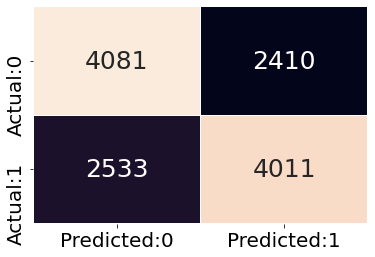

In [553]:
plot_confusion_matrix(lr_model, test_data = X_test)

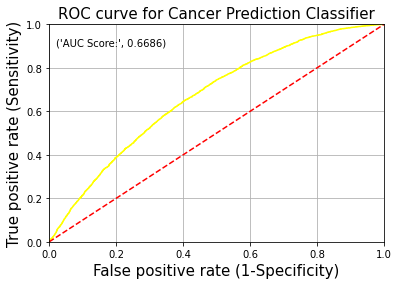

In [554]:
plot_roc(lr_model, test_data = X_test,color='yellow')

Performance of the model on Training Data:

Confusion matrix:

[[16462  9633]
 [ 9885 16157]]

Classification report:

              precision    recall  f1-score   support

           0       0.62      0.63      0.63     26095
           1       0.63      0.62      0.62     26042

    accuracy                           0.63     52137
   macro avg       0.63      0.63      0.63     52137
weighted avg       0.63      0.63      0.63     52137


Performance of the model on testing Data:

Confusion matrix:

[[4081 2410]
 [2533 4011]]

Classification report:

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      6491
           1       0.62      0.61      0.62      6544

    accuracy                           0.62     13035
   macro avg       0.62      0.62      0.62     13035
weighted avg       0.62      0.62      0.62     13035


Training Accuracy: 0.6256401403993326
Testing Accuracy: 0.6207901802838511

ROC AUC graph:


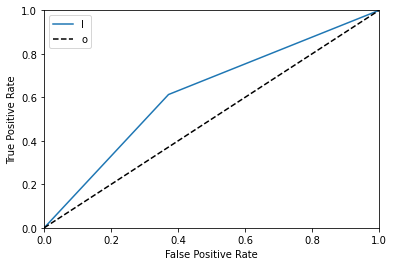

In [592]:
LR=LogisticRegression(random_state=10)
model_evaluation('Logistic',LR,X_train,y_train,X_test,y_test)

In [593]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,KNN,1209,5282,262,6282,0.543238,0.959963,0.693837,0.573111,0.583194,0.574684,0.146681
1,Logistic,4081,2410,2533,4011,0.624669,0.612928,0.618743,0.620822,0.625640,0.620790,0.241626


# Decision Tree

In [557]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
dt_model = decision_tree_classification.fit(X_train, y_train)

In [558]:
train_report = get_train_report(dt_model,X_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26095
           1       1.00      1.00      1.00     26042

    accuracy                           1.00     52137
   macro avg       1.00      1.00      1.00     52137
weighted avg       1.00      1.00      1.00     52137



In [559]:
test_report = get_test_report(dt_model,X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6491
           1       0.90      0.93      0.91      6544

    accuracy                           0.91     13035
   macro avg       0.91      0.91      0.91     13035
weighted avg       0.91      0.91      0.91     13035

None


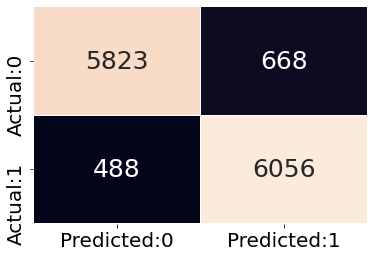

In [560]:
plot_confusion_matrix(dt_model, test_data = X_test)

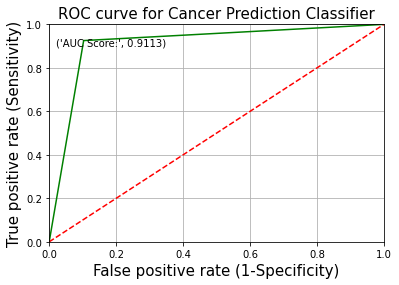

In [561]:
plot_roc(dt_model, test_data = X_test,color='g')

Performance of the model on Training Data:

Confusion matrix:

[[26095     0]
 [    0 26042]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26095
           1       1.00      1.00      1.00     26042

    accuracy                           1.00     52137
   macro avg       1.00      1.00      1.00     52137
weighted avg       1.00      1.00      1.00     52137


Performance of the model on testing Data:

Confusion matrix:

[[5823  668]
 [ 488 6056]]

Classification report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6491
           1       0.90      0.93      0.91      6544

    accuracy                           0.91     13035
   macro avg       0.91      0.91      0.91     13035
weighted avg       0.91      0.91      0.91     13035


Training Accuracy: 1.0
Testing Accuracy: 0.9113156885308784

ROC AUC graph:


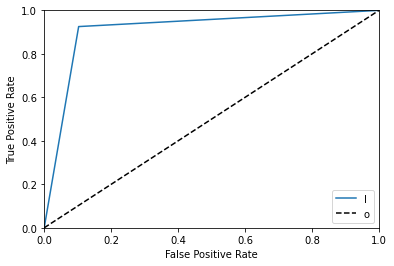

In [594]:
DT=DecisionTreeClassifier(random_state=10)
model_evaluation('DecisionTree',DT,X_train,y_train,X_test,y_test)

In [595]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,KNN,1209,5282,262,6282,0.543238,0.959963,0.693837,0.573111,0.583194,0.574684,0.146681
1,Logistic,4081,2410,2533,4011,0.624669,0.612928,0.618743,0.620822,0.625640,0.620790,0.241626
2,DecisionTree,5823,668,488,6056,0.900654,0.925428,0.912873,0.911258,1.000000,0.911316,0.822609


## Random Forest:

In [447]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [448]:
train_report = get_train_report(rf_model,X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26095
           1       1.00      0.99      0.99     26042

    accuracy                           0.99     52137
   macro avg       0.99      0.99      0.99     52137
weighted avg       0.99      0.99      0.99     52137



In [508]:
test_report = get_test_report(rf_model,X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6491
           1       1.00      0.92      0.96      6544

    accuracy                           0.96     13035
   macro avg       0.96      0.96      0.96     13035
weighted avg       0.96      0.96      0.96     13035

None


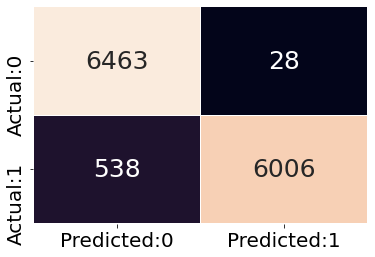

In [450]:
plot_confusion_matrix(rf_model, test_data = X_test)

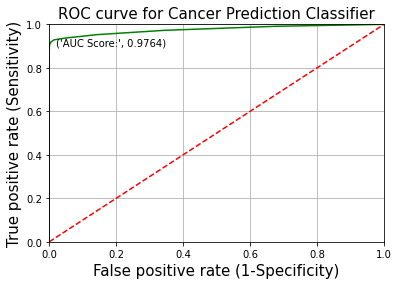

In [451]:
plot_roc(rf_model, test_data = X_test,color='g')

Accuracy of the GBM on test set: 0.957
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6491
           1       1.00      0.92      0.96      6544

    accuracy                           0.96     13035
   macro avg       0.96      0.96      0.96     13035
weighted avg       0.96      0.96      0.96     13035



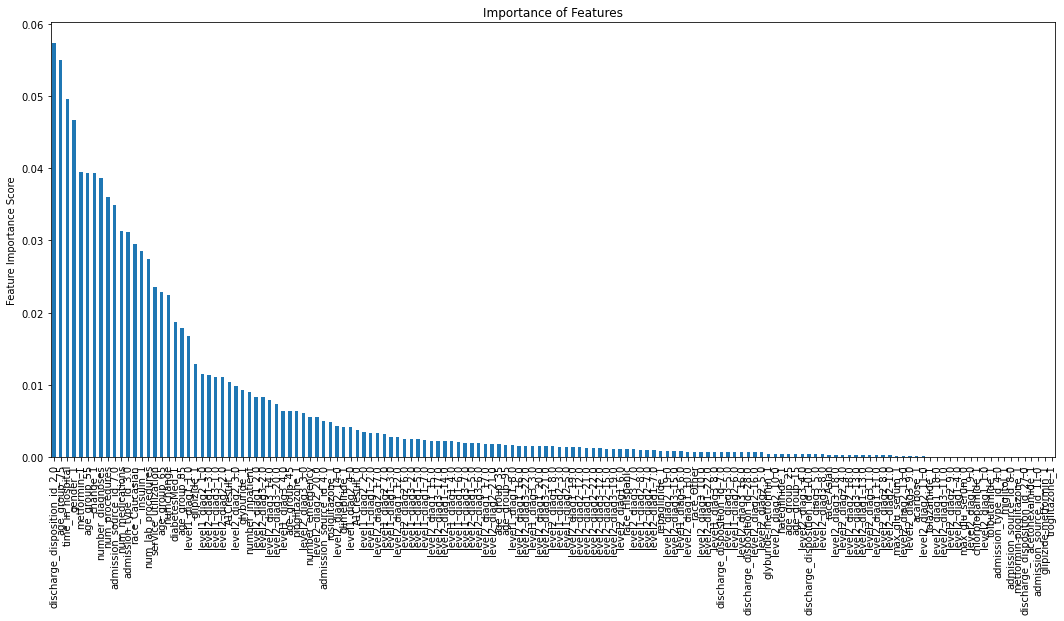

In [458]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)


rf_model = rf_classification.fit(X_train, y_train)
predictors=list(X_train)
feat_imp = pd.Series(rf_model.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(18,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(rf_model.score(X_test, y_test)))
pred=rf_model.predict(X_test)
print(classification_report(y_test, pred))

Performance of the model on Training Data:

Confusion matrix:

[[26095     0]
 [  300 25742]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26095
           1       1.00      0.99      0.99     26042

    accuracy                           0.99     52137
   macro avg       0.99      0.99      0.99     52137
weighted avg       0.99      0.99      0.99     52137


Performance of the model on testing Data:

Confusion matrix:

[[6463   28]
 [ 538 6006]]

Classification report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6491
           1       1.00      0.92      0.96      6544

    accuracy                           0.96     13035
   macro avg       0.96      0.96      0.96     13035
weighted avg       0.96      0.96      0.96     13035


Training Accuracy: 0.9942459289947638
Testing Accuracy: 0.9565784426543921

ROC AUC graph:


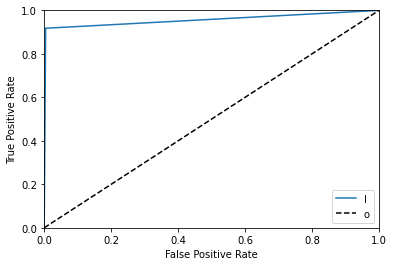

In [596]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
model_evaluation('RandomForest',rf_classification,X_train,y_train,X_test,y_test)

In [597]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,KNN,1209,5282,262,6282,0.543238,0.959963,0.693837,0.573111,0.583194,0.574684,0.146681
1,Logistic,4081,2410,2533,4011,0.624669,0.612928,0.618743,0.620822,0.625640,0.620790,0.241626
2,DecisionTree,5823,668,488,6056,0.900654,0.925428,0.912873,0.911258,1.000000,0.911316,0.822609
3,RandomForest,6463,28,538,6006,0.995360,0.917787,0.955001,0.956737,0.994246,0.956578,0.913183


# ADA Boosting:

In [453]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model = ada_model.fit(X_train, y_train)

In [454]:
train_report = get_train_report(ada_model,X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     26095
           1       0.98      0.86      0.92     26042

    accuracy                           0.92     52137
   macro avg       0.93      0.92      0.92     52137
weighted avg       0.93      0.92      0.92     52137



In [455]:
test_report = get_test_report(ada_model,X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6491
           1       0.98      0.87      0.92      6544

    accuracy                           0.93     13035
   macro avg       0.93      0.93      0.92     13035
weighted avg       0.93      0.93      0.92     13035



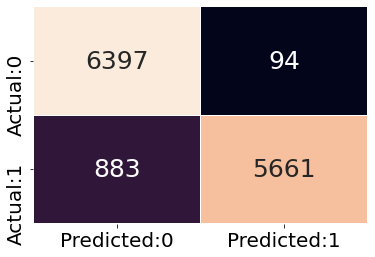

In [456]:
plot_confusion_matrix(ada_model, test_data = X_test)

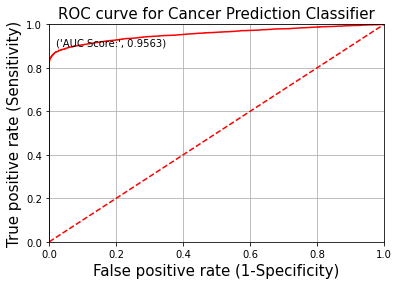

In [457]:
plot_roc(ada_model,test_data=X_test,color='r')

Accuracy of the GBM on test set: 0.925
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6491
           1       0.98      0.87      0.92      6544

    accuracy                           0.93     13035
   macro avg       0.93      0.93      0.92     13035
weighted avg       0.93      0.93      0.92     13035



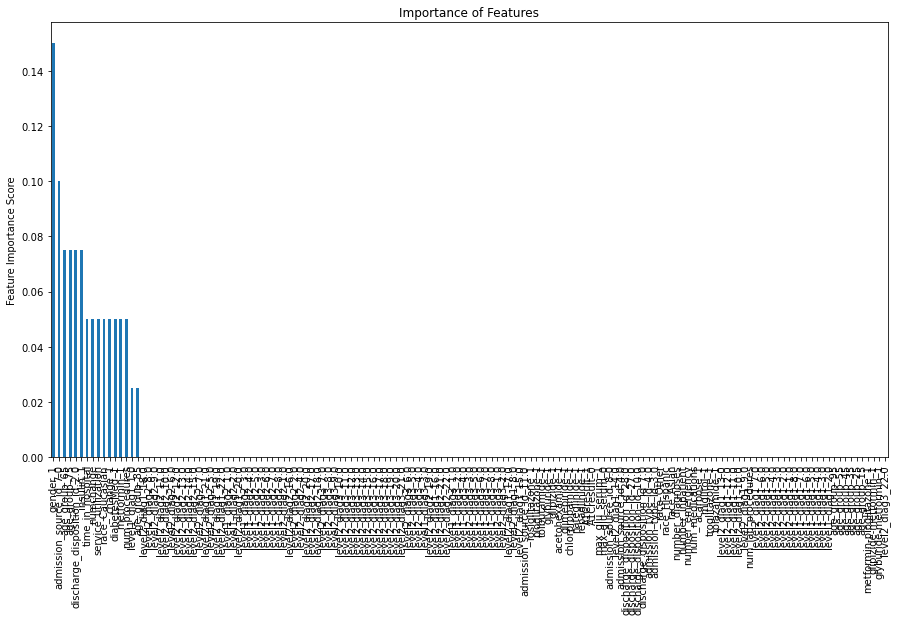

In [459]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model = ada_model.fit(X_train, y_train)
predictors=list(X_train)
feat_imp = pd.Series(ada_model.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(ada_model.score(X_test, y_test)))
pred=ada_model.predict(X_test)
print(classification_report(y_test, pred))

Performance of the model on Training Data:

Confusion matrix:

[[25728   367]
 [ 3768 22274]]

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     26095
           1       0.98      0.86      0.92     26042

    accuracy                           0.92     52137
   macro avg       0.93      0.92      0.92     52137
weighted avg       0.93      0.92      0.92     52137


Performance of the model on testing Data:

Confusion matrix:

[[6397   94]
 [ 883 5661]]

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6491
           1       0.98      0.87      0.92      6544

    accuracy                           0.93     13035
   macro avg       0.93      0.93      0.92     13035
weighted avg       0.93      0.93      0.92     13035


Training Accuracy: 0.920689721311161
Testing Accuracy: 0.925047947832758

ROC AUC graph:


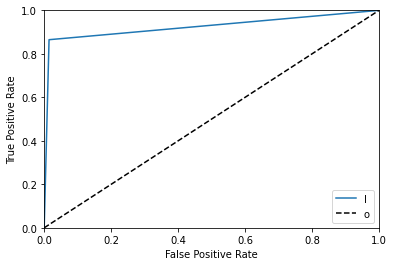

In [598]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
model_evaluation('ADA',ada_model,X_train,y_train,X_test,y_test)

In [599]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,KNN,1209,5282,262,6282,0.543238,0.959963,0.693837,0.573111,0.583194,0.574684,0.146681
1,Logistic,4081,2410,2533,4011,0.624669,0.612928,0.618743,0.620822,0.625640,0.620790,0.241626
2,DecisionTree,5823,668,488,6056,0.900654,0.925428,0.912873,0.911258,1.000000,0.911316,0.822609
3,RandomForest,6463,28,538,6006,0.995360,0.917787,0.955001,0.956737,0.994246,0.956578,0.913183
4,ADA,6397,94,883,5661,0.983666,0.865067,0.920563,0.925293,0.920690,0.925048,0.850167


# GradientBoosting: 

In [570]:
gboost_model = GradientBoostingClassifier( random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [571]:
train_report = get_train_report(gboost_model,X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     26095
           1       1.00      0.90      0.95     26042

    accuracy                           0.95     52137
   macro avg       0.95      0.95      0.95     52137
weighted avg       0.95      0.95      0.95     52137



In [572]:
test_report = get_test_report(gboost_model,X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6491
           1       1.00      0.90      0.95      6544

    accuracy                           0.95     13035
   macro avg       0.96      0.95      0.95     13035
weighted avg       0.96      0.95      0.95     13035

None


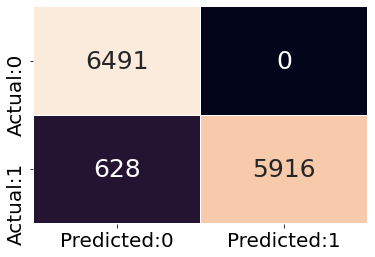

In [573]:
plot_confusion_matrix(gboost_model,test_data=X_test)

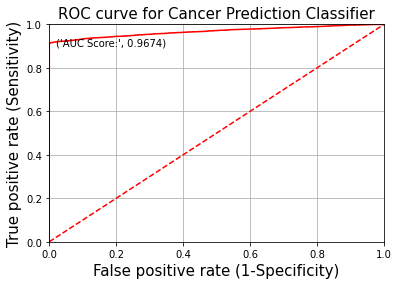

In [574]:
plot_roc(gboost_model,test_data=X_test,color='r')

Accuracy of the GBM on test set: 0.952
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6491
           1       1.00      0.90      0.95      6544

    accuracy                           0.95     13035
   macro avg       0.96      0.95      0.95     13035
weighted avg       0.96      0.95      0.95     13035



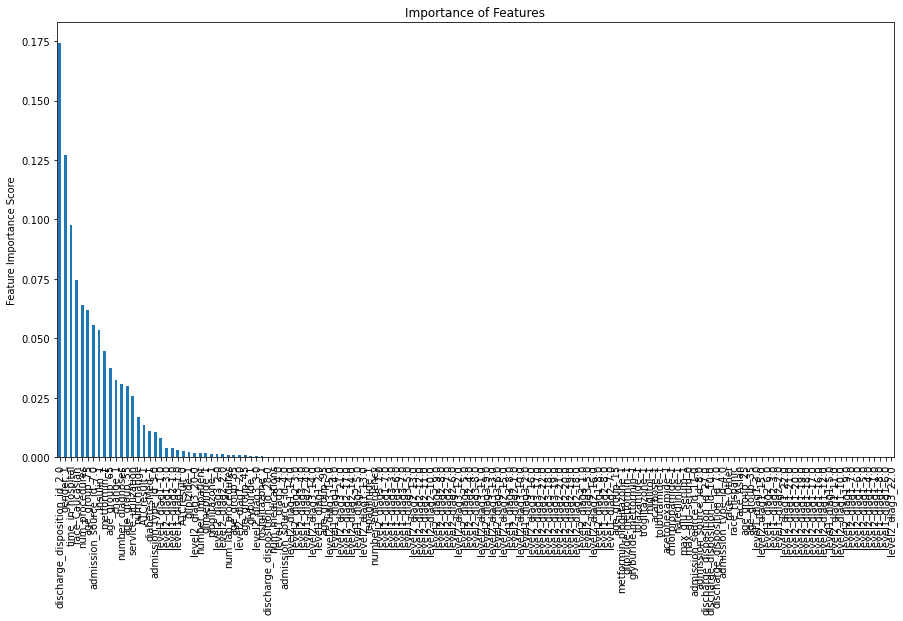

In [575]:
gboost_model = GradientBoostingClassifier(random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)
predictors=list(X_train)
feat_imp = pd.Series(gboost_model.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(gboost_model.score(X_test, y_test)))
pred=gboost_model.predict(X_test)
print(classification_report(y_test, pred))

Performance of the model on Training Data:

Confusion matrix:

[[26095     0]
 [ 2699 23343]]

Classification report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     26095
           1       1.00      0.90      0.95     26042

    accuracy                           0.95     52137
   macro avg       0.95      0.95      0.95     52137
weighted avg       0.95      0.95      0.95     52137


Performance of the model on testing Data:

Confusion matrix:

[[6491    0]
 [ 628 5916]]

Classification report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6491
           1       1.00      0.90      0.95      6544

    accuracy                           0.95     13035
   macro avg       0.96      0.95      0.95     13035
weighted avg       0.96      0.95      0.95     13035


Training Accuracy: 0.9482325411895582
Testing Accuracy: 0.9518220176448025

ROC AUC graph:


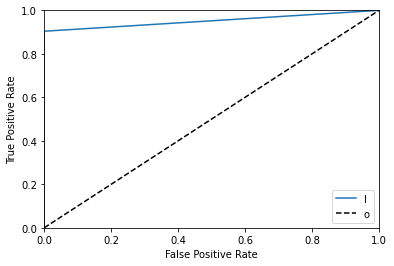

In [600]:
gboost_model = GradientBoostingClassifier( random_state = 10)
model_evaluation('GB',gboost_model,X_train,y_train,X_test,y_test)

In [601]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,KNN,1209,5282,262,6282,0.543238,0.959963,0.693837,0.573111,0.583194,0.574684,0.146681
1,Logistic,4081,2410,2533,4011,0.624669,0.612928,0.618743,0.620822,0.625640,0.620790,0.241626
2,DecisionTree,5823,668,488,6056,0.900654,0.925428,0.912873,0.911258,1.000000,0.911316,0.822609
3,RandomForest,6463,28,538,6006,0.995360,0.917787,0.955001,0.956737,0.994246,0.956578,0.913183
4,ADA,6397,94,883,5661,0.983666,0.865067,0.920563,0.925293,0.920690,0.925048,0.850167
5,GB,6491,0,628,5916,1.000000,0.904034,0.949599,0.952017,0.948233,0.951822,0.903680


# XGBClassifier

In [578]:
xgb_model = XGBClassifier(random_state=10)

xgb_model=xgb_model.fit(X_train, y_train)
xgb_model

[13:21:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [579]:
train_report = get_train_report(xgb_model,X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     26095
           1       1.00      0.91      0.95     26042

    accuracy                           0.96     52137
   macro avg       0.96      0.96      0.96     52137
weighted avg       0.96      0.96      0.96     52137



In [580]:
test_report = get_test_report(xgb_model,X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6491
           1       1.00      0.92      0.96      6544

    accuracy                           0.96     13035
   macro avg       0.96      0.96      0.96     13035
weighted avg       0.96      0.96      0.96     13035

None


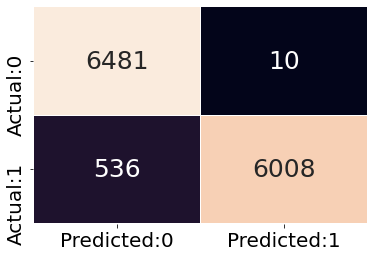

In [581]:
plot_confusion_matrix(xgb_model,test_data=X_test)

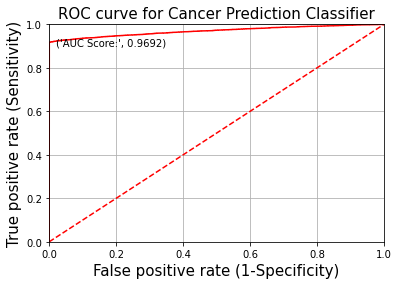

In [582]:
plot_roc(xgb_model,test_data=X_test,color='r')

[13:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the GBM on test set: 0.957
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6491
           1       0.99      0.92      0.96      6544

    accuracy                           0.96     13035
   macro avg       0.96      0.96      0.96     13035
weighted avg       0.96      0.96      0.96     13035



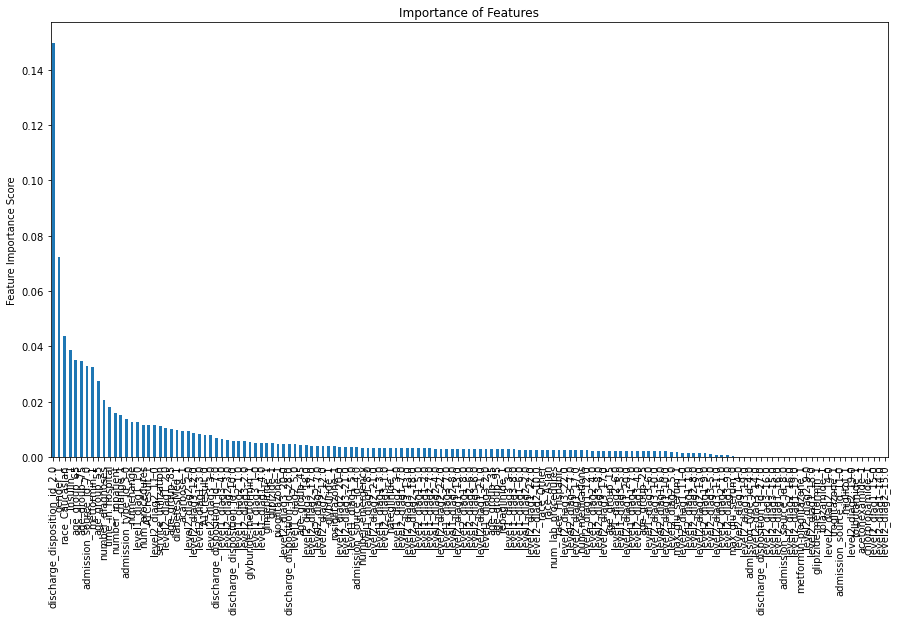

In [583]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model=xgb_model.fit(X_train, y_train)
predictors=list(X_train)
feat_imp = pd.Series(xgb_model.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(xgb_model.score(X_test, y_test)))
pred=xgb_model.predict(X_test)
print(classification_report(y_test, pred))

[13:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance of the model on Training Data:

Confusion matrix:

[[26091     4]
 [ 2307 23735]]

Classification report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     26095
           1       1.00      0.91      0.95     26042

    accuracy                           0.96     52137
   macro avg       0.96      0.96      0.96     52137
weighted avg       0.96      0.96      0.96     52137


Performance of the model on testing Data:

Confusion matrix:

[[6481   10]
 [ 536 6008]]

Classification report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6491
           1       1

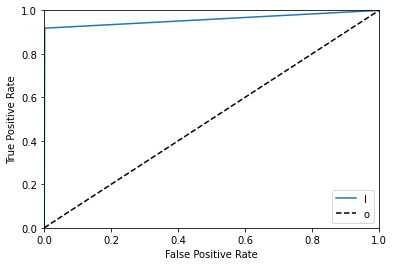

In [602]:
xgb_model = XGBClassifier(random_state=10)
model_evaluation('XGB',xgb_model,X_train,y_train,X_test,y_test)

In [603]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,KNN,1209,5282,262,6282,0.543238,0.959963,0.693837,0.573111,0.583194,0.574684,0.146681
1,Logistic,4081,2410,2533,4011,0.624669,0.612928,0.618743,0.620822,0.625640,0.620790,0.241626
2,DecisionTree,5823,668,488,6056,0.900654,0.925428,0.912873,0.911258,1.000000,0.911316,0.822609
3,RandomForest,6463,28,538,6006,0.995360,0.917787,0.955001,0.956737,0.994246,0.956578,0.913183
4,ADA,6397,94,883,5661,0.983666,0.865067,0.920563,0.925293,0.920690,0.925048,0.850167
5,GB,6491,0,628,5916,1.000000,0.904034,0.949599,0.952017,0.948233,0.951822,0.903680
6,XGB,6481,10,536,6008,0.998338,0.918093,0.956536,0.958276,0.955674,0.958113,0.916252


# Naive Bayes Model:

In [472]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [473]:
train_report = get_train_report(gnb_model,X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.74      0.02      0.04     26095
           1       0.50      0.99      0.67     26042

    accuracy                           0.51     52137
   macro avg       0.62      0.51      0.35     52137
weighted avg       0.62      0.51      0.35     52137



In [474]:
test_report = get_test_report(gnb_model,X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.79      0.02      0.05      6491
           1       0.51      0.99      0.67      6544

    accuracy                           0.51     13035
   macro avg       0.65      0.51      0.36     13035
weighted avg       0.65      0.51      0.36     13035



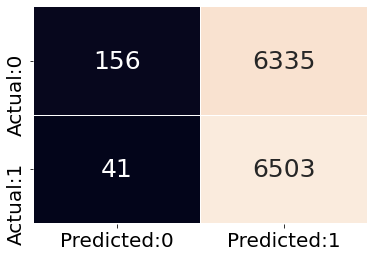

In [475]:
plot_confusion_matrix(gnb_model, test_data=X_test)

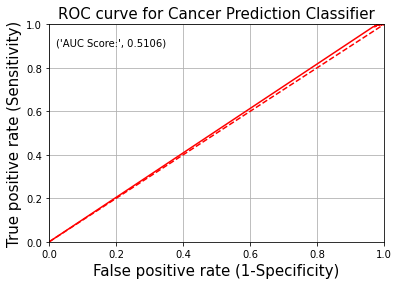

In [476]:
plot_roc(gnb_model,test_data=X_test,color='r')

Performance of the model on Training Data:

Confusion matrix:

[[  559 25536]
 [  194 25848]]

Classification report:

              precision    recall  f1-score   support

           0       0.74      0.02      0.04     26095
           1       0.50      0.99      0.67     26042

    accuracy                           0.51     52137
   macro avg       0.62      0.51      0.35     52137
weighted avg       0.62      0.51      0.35     52137


Performance of the model on testing Data:

Confusion matrix:

[[ 156 6335]
 [  41 6503]]

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.02      0.05      6491
           1       0.51      0.99      0.67      6544

    accuracy                           0.51     13035
   macro avg       0.65      0.51      0.36     13035
weighted avg       0.65      0.51      0.36     13035


Training Accuracy: 0.5064925101175749
Testing Accuracy: 0.510855389336402

ROC AUC graph:


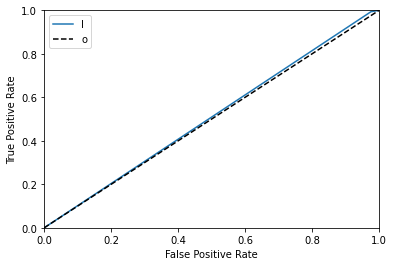

In [604]:
gnb = GaussianNB()
model_evaluation('GaussianNB',gnb_model,X_train,y_train,X_test,y_test)

In [605]:
scorecard

,Model,tn,fp,fn,tp,Precision,Recall,F1_score,AUC,Train_Accuracy,Test_Accuracy,Kappa_score
0,KNN,1209,5282,262,6282,0.543238,0.959963,0.693837,0.573111,0.583194,0.574684,0.146681
1,Logistic,4081,2410,2533,4011,0.624669,0.612928,0.618743,0.620822,0.625640,0.620790,0.241626
2,DecisionTree,5823,668,488,6056,0.900654,0.925428,0.912873,0.911258,1.000000,0.911316,0.822609
3,RandomForest,6463,28,538,6006,0.995360,0.917787,0.955001,0.956737,0.994246,0.956578,0.913183
4,ADA,6397,94,883,5661,0.983666,0.865067,0.920563,0.925293,0.920690,0.925048,0.850167
5,GB,6491,0,628,5916,1.000000,0.904034,0.949599,0.952017,0.948233,0.951822,0.903680
6,XGB,6481,10,536,6008,0.998338,0.918093,0.956536,0.958276,0.955674,0.958113,0.916252
7,GaussianNB,156,6335,41,6503,0.506543,0.993735,0.671035,0.508884,0.506493,0.510855,0.017838


# HyperTuning:

### Random Forest:

In [512]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],'n_estimators': [10, 30, 50, 70],
                    'min_samples_leaf': [1000,1250,1500],'min_samples_split': [3000,3750, 4500],'max_features': ['sqrt', 'log2']}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 3,n_jobs=1)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1000, 'min_samples_split': 3750, 'n_estimators': 50} 



In [527]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],'n_estimators': [10, 30, 50, 70],'min_samples_leaf':[1,3,5,7,9],
                    'max_leaf_nodes': [750,1000,1250,1500],'min_samples_split': [2000,2500,3000,3750, 4500],'max_features': ['sqrt', 'log2']}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 3,n_jobs=1)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 750, 'min_samples_leaf': 1, 'min_samples_split': 2000, 'n_estimators': 70} 



In [525]:
rf_classification = RandomForestClassifier(random_state = 10,criterion= 'entropy',min_samples_split= 3000,
                                                              max_features= 'sqrt', min_samples_leaf= 3,max_leaf_nodes= 750,
                                                              n_estimators= 50)


rf_model_hy = rf_classification.fit(X_train, y_train)

In [526]:
train_report = get_train_report(rf_model_hy,X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     26095
           1       0.92      0.84      0.88     26042

    accuracy                           0.89     52137
   macro avg       0.89      0.89      0.89     52137
weighted avg       0.89      0.89      0.89     52137



Accuracy of the GBM on test set: 0.698
              precision    recall  f1-score   support

           0       0.67      0.76      0.72      6491
           1       0.73      0.63      0.68      6544

    accuracy                           0.70     13035
   macro avg       0.70      0.70      0.70     13035
weighted avg       0.70      0.70      0.70     13035



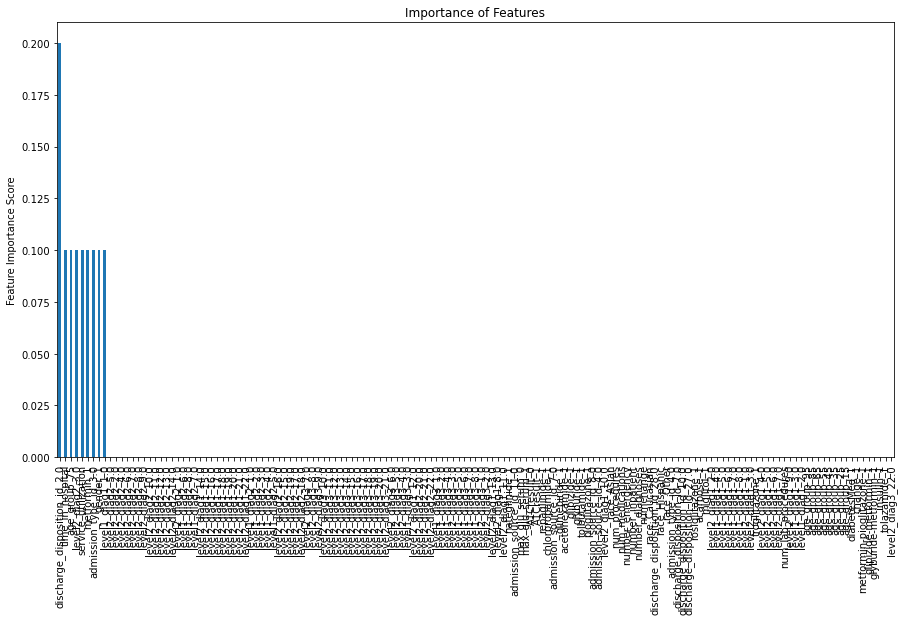

In [529]:
rf_classification = RandomForestClassifier(random_state = 10,criterion='gini',n_estimators= 10,max_depth= 30,
                                                     max_features= 'sqrt',max_leaf_nodes = 2, min_samples_leaf= 3,
                                                      min_samples_split= 3)
rf_classification.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(rf_classification.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(rf_classification.score(X_test, y_test)))
pred=rf_classification.predict(X_test)
print(classification_report(y_test, pred))

### Hypertuning -- GradientBoosting

Accuracy of the GBM on test set: 0.934
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6491
           1       0.99      0.88      0.93      6544

    accuracy                           0.93     13035
   macro avg       0.94      0.93      0.93     13035
weighted avg       0.94      0.93      0.93     13035



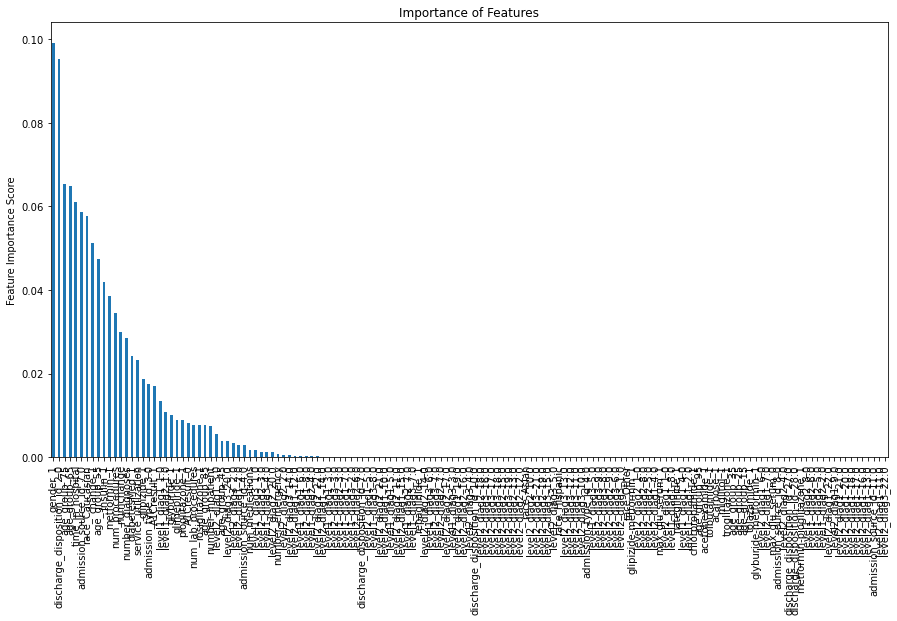

In [532]:
gb_model_base = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2,
                                           min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gb_model_base.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(gb_model_base.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(gb_model_base.score(X_test,y_test)))
pred=gb_model_base.predict(X_test)
print(classification_report(y_test, pred))

In [530]:
p_test1 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[10,15,20,25,30,40,50,100],'max_depth':[0.1,0.2,0.3,1,2,3,4,5,6,7],
          'min_samples_leaf':[1,3,5,7,9],'min_samples_split':[2,4,6,8,10,20,40,60,100],}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=10), 
                      param_grid = p_test1, scoring='accuracy',n_jobs=1, cv=3)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

KeyboardInterrupt: 

In [153]:
p_test1 = {'n_estimators':[10,15,20,25,30,40,50,100]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,max_depth=4, min_samples_split=2,
                                                            min_samples_leaf=1,subsample=1,max_features='sqrt', random_state=10), 
                      param_grid = p_test1, scoring='accuracy',n_jobs=4, cv=3)
tuning.fit(X_train_sc,y_train)
tuning.best_params_, tuning.best_score_

({'n_estimators': 10}, 0.8848439601536935)

### Max Depth

In [161]:
p_test2 = {'max_depth':[0.1,0.2,0.3,1,2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4, cv=3)
tuning.fit(X_train_sc,y_train)
tuning.best_params_, tuning.best_score_

({'max_depth': 0.1}, 0.8848439601536935)

Accuracy of the GBM on test set: 0.885
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     25391
           1       0.00      0.00      0.00      3311

    accuracy                           0.88     28702
   macro avg       0.44      0.50      0.47     28702
weighted avg       0.78      0.88      0.83     28702



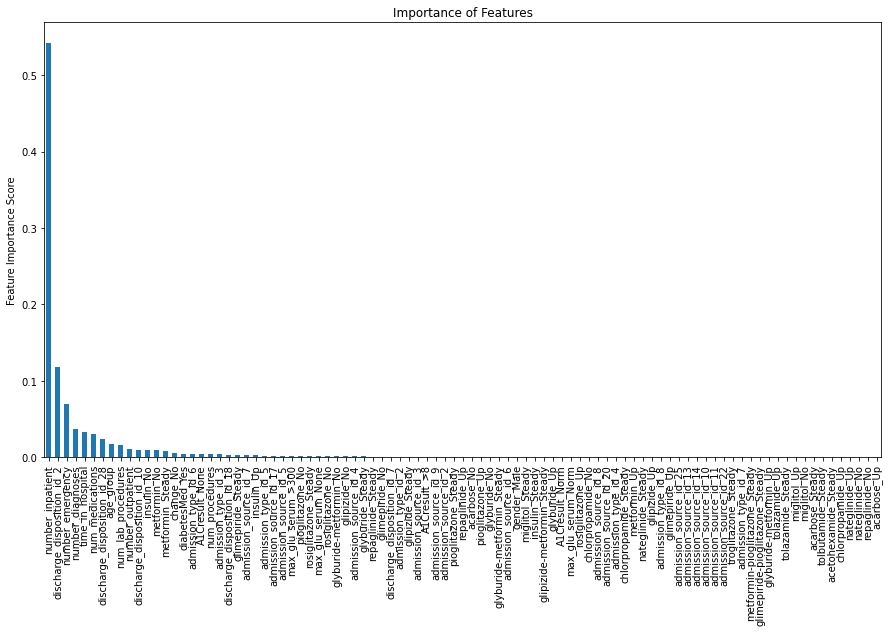

In [159]:
model1 = GradientBoostingClassifier(learning_rate=0.05,min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train_sc,y_train)
predictors=list(X_train_sc)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test_sc, y_test)))
pred=model1.predict(X_test_sc)
print(classification_report(y_test, pred))

In [168]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test4, scoring='accuracy',n_jobs=4, cv=3)
tuning.fit(X_train_sc,y_train)
tuning.best_params_, tuning.best_score_

({'min_samples_leaf': 7, 'min_samples_split': 2}, 0.8848588931046834)

Accuracy of the GBM on test set: 0.885
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     25391
           1       0.00      0.00      0.00      3311

    accuracy                           0.88     28702
   macro avg       0.44      0.50      0.47     28702
weighted avg       0.78      0.88      0.83     28702



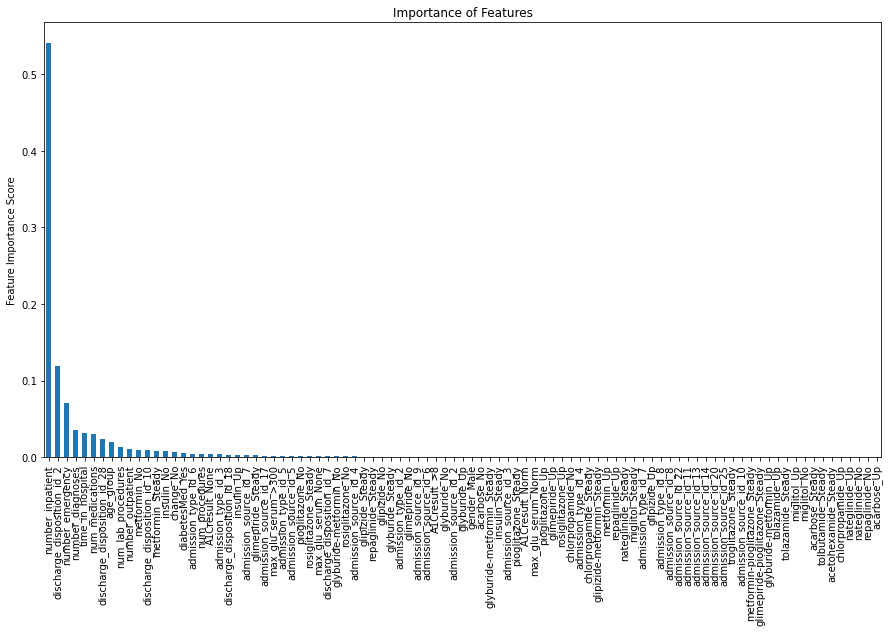

In [170]:
model1 = GradientBoostingClassifier(learning_rate=0.05,min_samples_split=7, min_samples_leaf=2, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train_sc,y_train)
predictors=list(X_train_sc)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test_sc, y_test)))
pred=model1.predict(X_test_sc)
print(classification_report(y_test, pred))

In [171]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,min_samples_split=2, min_samples_leaf=7,max_features=4 , random_state=10), 
param_grid = p_test6, scoring='accuracy',n_jobs=4, cv=3)
tuning.fit(X_train_sc,y_train)
tuning.best_params_, tuning.best_score_

({'subsample': 0.7}, 0.8848439601536935)

Accuracy of the GBM on test set: 0.885
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     25391
           1       1.00      0.00      0.00      3311

    accuracy                           0.88     28702
   macro avg       0.94      0.50      0.47     28702
weighted avg       0.90      0.88      0.83     28702



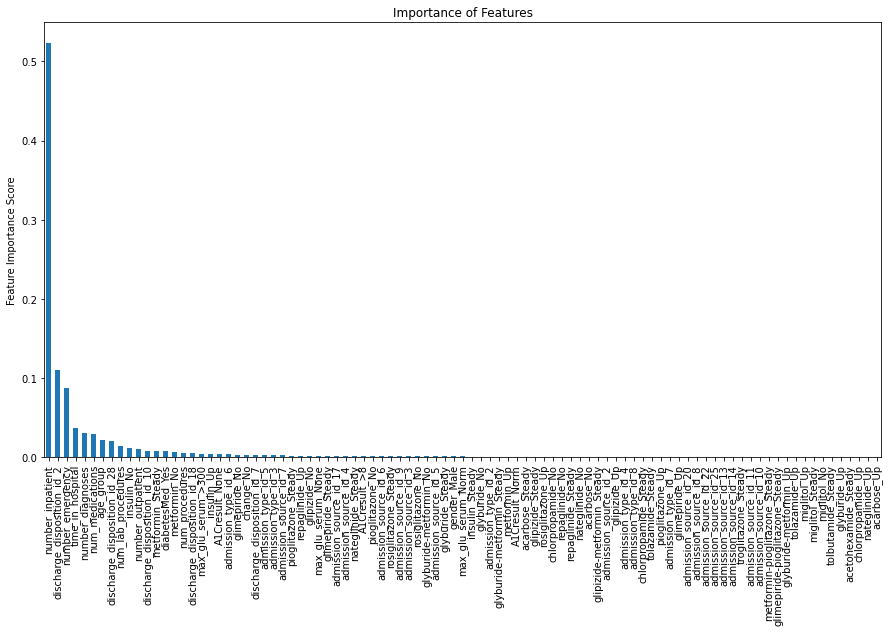

In [282]:
gb_hy = GradientBoostingClassifier(learning_rate=0.05,min_samples_split=7, min_samples_leaf=2, subsample=0.7,max_features='sqrt', random_state=10)
gb_hy.fit(X_train_sc,y_train)
predictors=list(X_train_sc)
feat_imp = pd.Series(gb_hy.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(gb_hy.score(X_test_sc, y_test)))
pred=gb_hy.predict(X_test_sc)
print(classification_report(y_test, pred))

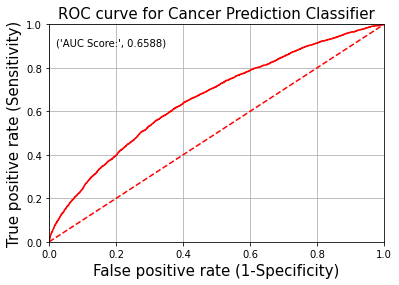

In [283]:
plot_roc(gb_hy,test_data=X_test_sc,color='r')

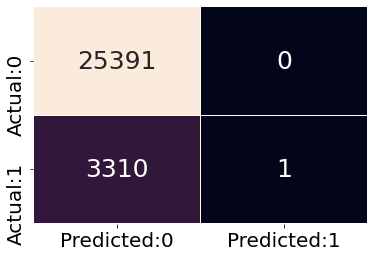

In [284]:
plot_confusion_matrix(gb_hy, test_data=X_test_sc)

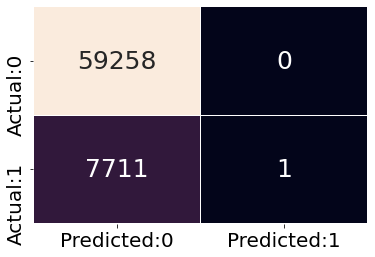

In [288]:
plot_confusion_matrix_train(gb_hy, train_data=X_train_sc)

# Model Comparision

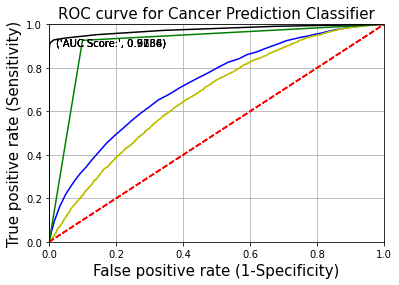

In [478]:
plot_roc(knn_model, test_data = X_test,color='b')
plot_roc(lr_model, test_data = X_test,color='y')
plot_roc(dt_model, test_data = X_test,color='g')
plot_roc(rf_model, test_data = X_test,color='black')